### ***Задание №3***

### ***Введение в анализ данных (первый семестр)***  

***Задача***  
Необходимо выполнить анализ датасета, применив полученные знания из пройденных тем. Для анализа могут быть выбраны любые данные: как уже готовые датасеты из Kaggle или любого другого источника, так и самостоятельно собранные данные. Так как в задании предстоит использовать предсказание по временным рядам, то необходимо выбрать такой датасет, в котором признаки можно было агрегировать по времени. Работы выполняются индивидуально.

***Критерии***  
Сложность используемого датасета (3 балла) – датасет не должен быть игрушечный, самое лучшее, чтобы это были реальные данные, взятые из реальной задачи, максимально непредобработанные (например – логи посещения сайтов пользователями). В проекте можно работать как с одной таблицей, так и с несколькими.
Первичный анализ данных (4 баллов) – изучить и описать, как были собраны данные, какие признаки, типы переменных есть в датасете. Описать, как будет происходить исследование, какая цель вашего проекта.
Предобработка данных (3 балла) – выполнить необходимую агрегацию данных, убрать лишние поля и объекты, дать пояснения, если в предобработке данных нет необходимости – написать, почему.
Визуальный анализ данных (4 баллов) – использовать различные типы графиков, чтобы описать данные, все должно сопровождаться комментариями: какие зависимости или интересные инсайты были получены.
Проверка статистических гипотез (8 баллов) - сформулировать статистические гипотезы в данных и проверить их с помощью статистических критериев (например - если это временной ряд, то изучить, изменились ли средние до и после определённого периода, или можно сравнить данные из разных групп). Как минимум – проверить 2 статистические гипотезы, должен быть использован любой параметрический и любой непараметрический критерий. Каждый шаг должен сопровождаться комментариями (если используете параметрический критерий, обязательно показывать, что его использование допустимо и корректно), должны быть сделаны выводы.
Построить предсказание временного ряда (5 баллов).
Сделать выводы о проделанном исследовании (3 балла) - указать, какие инсайты были найдены, о чем свидетельствует сделанный прогноз и выводы, полученные в ходе проверки статистических гипотез.

***Форма предоставления***  
Jupyter-ноутбук. В названии ноутбука должна быть указана фамилия и название группы.

***Дедлайн***  
Все работы должны быть высланы до 20.11.2018 23:59:00 по МСК на почту k.izmailov@corp.mail.ru, c темой: Техносфера. Мини-проект. Группа BD-11. <ваше имя и фамилия>

In [139]:
import requests
import pandas as pd
import json
import datetime
import os
import sys
from datetime import datetime, date, timedelta
import time
from tqdm import tqdm
import numpy as np
from itertools import product
import warnings
warnings.filterwarnings('ignore')

### Будем изучать погоду Москвы, данные возьмем с помощью:

![api_weather](images/api.png)

https://darksky.net/dev

* apparentTemperatureHigh optional, only on daily
> The daytime high apparent temperature.
* apparentTemperatureHighTime optional, only on daily
> The UNIX time representing when the daytime high apparent temperature occurs.
* apparentTemperatureLow optional, only on daily
> The overnight low apparent temperature.
* apparentTemperatureLowTime optional, only on daily
> The UNIX time representing when the overnight low apparent temperature occurs.
* apparentTemperatureMax optional, only on daily
> The maximum apparent temperature during a given date.
* apparentTemperatureMaxTime optional, only on daily
> The UNIX time representing when the maximum apparent temperature during a given date occurs.
* apparentTemperatureMin optional, only on daily
> The minimum apparent temperature during a given date.
* apparentTemperatureMinTime optional, only on daily
> The UNIX time representing when the minimum apparent temperature during a given date occurs.
* cloudCover optional
> The percentage of sky occluded by clouds, between 0 and 1, inclusive.
* dewPoint optional
> The dew point in degrees Fahrenheit.
* humidity optional
> The relative humidity, between 0 and 1, inclusive.
* icon optional
> A machine-readable text summary of this data point, suitable for selecting an icon for display. If defined, this property will have one of the following values: clear-day, clear-night, rain, snow, sleet, wind, fog, cloudy, partly-cloudy-day, or partly-cloudy-night. (Developers should ensure that a sensible default is defined, as additional values, such as hail, thunderstorm, or tornado, may be defined in the future.)
* moonPhase optional, only on daily
> The fractional part of the lunation number during the given day: a value of 0 corresponds to a new moon, 0.25 to a first quarter moon, 0.5 to a full moon, and 0.75 to a last quarter moon. (The ranges in between these represent waxing crescent, waxing gibbous, waning gibbous, and waning crescent moons, respectively.)
* ozone optional
> The columnar density of total atmospheric ozone at the given time in Dobson units.
* precipAccumulation optional, only on hourly and daily
> The amount of snowfall accumulation expected to occur, in inches. (If no snowfall is expected, this property will not be defined.)
* precipIntensity optional
> The intensity (in inches of liquid water per hour) of precipitation occurring at the given time. This value is conditional on probability (that is, assuming any precipitation occurs at all).
* precipIntensityError optional
> The standard deviation of the distribution of precipIntensity. (We only return this property when the full distribution, and not merely the expected mean, can be estimated with accuracy.)
* precipIntensityMax optional, only on daily
> The maximum value of precipIntensity during a given day.
* precipIntensityMaxTime optional, only on daily
> The UNIX time of when precipIntensityMax occurs during a given day.
* precipProbability optional
> The probability of precipitation occurring, between 0 and 1, inclusive.
* precipType optional
> The type of precipitation occurring at the given time. If defined, this property will have one of the following values: "rain", "snow", or "sleet" (which refers to each of freezing rain, ice pellets, and “wintery mix”). (If precipIntensity is zero, then this property will not be defined. Additionally, due to the lack of data in our sources, historical precipType information is usually estimated, rather than observed.)
* pressure optional
> The sea-level air pressure in millibars.
* summary optional
> A human-readable text summary of this data point. (This property has millions of possible values, so don’t use it for automated purposes: use the icon property, instead!)
* sunriseTime optional, only on daily
> The UNIX time of when the sun will rise during a given day.
* sunsetTime optional, only on daily
> The UNIX time of when the sun will set during a given day.
* temperature optional, not on minutely
> The air temperature in degrees Fahrenheit.
* temperatureHigh optional, only on daily
> The daytime high temperature.
* temperatureHighTime optional, only on daily
> The UNIX time representing when the daytime high temperature occurs.
* temperatureLow optional, only on daily
> The overnight low temperature.
* temperatureLowTime optional, only on daily
> The UNIX time representing when the overnight low temperature occurs.
* temperatureMax optional, only on daily deprecated
> The maximum temperature during a given date.
* temperatureMaxTime optional, only on daily deprecated
> The UNIX time representing when the maximum temperature during a given date occurs.
* temperatureMin optional, only on daily deprecated
> The minimum temperature during a given date.
* temperatureMinTime optional, only on daily deprecated
> The UNIX time representing when the minimum temperature during a given date occurs.
* time required
> The UNIX time at which this data point begins. minutely data point are always aligned to the top of the minute, hourly data point objects to the top of the hour, and daily data point objects to midnight of the day, all according to the local time zone.
* uvIndex optional
> The UV index.
* uvIndexTime optional, only on daily
> The UNIX time of when the maximum uvIndex occurs during a given day.
* visibility optional
> The average visibility in miles, capped at 10 miles.
* windBearing optional
> The direction that the wind is coming from in degrees, with true north at 0° and progressing clockwise. (If windSpeed is zero, then this value will not be defined.)
* windGust optional
> The wind gust speed in miles per hour.
* windGustTime optional, only on daily
> The time at which the maximum wind gust speed occurs during the day.
* windSpeed optional
> The wind speed in miles per hour.

In [140]:
def get_weather(arg):
    time_unix_list = arg[0]
    location = 'Moscow, Russia'
    key_api = arg[1]
    site = "https://api.darksky.net/forecast/"
    #lat = location.latitude
    #lon = location.longitude
    lat = '55.8257065'
    lon = '37.6384964'
    for t in tqdm(time_unix_list, total = len(time_unix_list)):
        URL = site + key_api + "/" + str(lat) + "," + str(lon) + "," + str(t)
        #print(URL)
        respones = requests.get(URL)
        json_repsonse= respones.json()
        Data = json_repsonse["daily"]["data"][0]
        weather_day = {
            "location" : location,
            "latitude" : [lat],
            "longitude": [lon],
            "apparentTemperatureHigh" : '',
            "apparentTemperatureHighTime" : '',
            "apparentTemperatureLow" : '',
            "apparentTemperatureLowTime" : '',
            "apparentTemperatureMax" : '',
            "apparentTemperatureMaxTime" : '',
            "apparentTemperatureMin" : '',
            "apparentTemperatureMinTime" : '',
            "cloudCover" : '',
            "dewPoint" : '',
            "humidity" : '',
            "icon" : '',
            "moonPhase" : '',
            "ozone" : '',
            "precipIntensity" : '',
            "precipIntensityMax" : '',
            "precipIntensityMaxTime" : '',
            "precipProbability" : '',
            "precipType" : '',
            "precipAccumulation" : '',
            "precipType" : '',
            "pressure" : '',
            "pressureError" : '',
            "summary" : '',
            "sunriseTime" : '',
            "sunsetTime" : '',
            "temperatureHigh" : '',
            "temperatureHighTime" : '',
            "temperatureLow" : '',
            "temperatureLowTime" : '',
            "temperatureMax" : '',
            "temperatureMaxTime" : '',
            "temperatureMin" : '',
            "temperatureMinTime" : '',
            "time" : '',
            "uvIndex" : '',
            "uvIndexTime" : '',
            "visibility" : '',
            "windBearing" : '',
            "windGust" : '',
            "windSpeed" : ''
        }
        for key, value in Data.items():
            if key in weather_day.keys():
                weather_day[key] = value
        list_time = (
            "apparentTemperatureHighTime",
            "apparentTemperatureLowTime",
            "apparentTemperatureMaxTime",
            "apparentTemperatureMinTime",
            "temperatureHighTime",
            "temperatureLowTime",
            "temperatureMaxTime",
            "temperatureMinTime",
            'time',
            'sunriseTime',
            'sunsetTime',
            'uvIndexTime'
        )
        for time_name in list_time:
            weather_day[time_name] = datetime.fromtimestamp(weather_day[time_name]).strftime('%Y-%m-%d %H:%M:%S')
        list_temp = (
            "apparentTemperatureHigh",
            "apparentTemperatureLow",
            "apparentTemperatureMax",
            "apparentTemperatureMin",
            "temperatureHigh",
            "temperatureLow",
            "temperatureMax",
            "temperatureMin",
            "dewPoint"
        )
        for temp_name in list_temp:
            weather_day[temp_name] = (weather_day[temp_name] - 32) * 5/9
        weather = pd.DataFrame(weather_day)
        
        if os.path.isfile("moscow_weather_up.csv"):
            weather.to_csv("moscow_weather_up.csv",mode='a', index=False, header=False)
        else:
            weather.to_csv("moscow_weather_up.csv",mode='a', index=False)

In [141]:
d1 = date(2008,1,1)
d2 = date(2008,1,23)

In [142]:
key = ['35cdd4b35e9b486cdf7aef0471a4d223',
       'c08fb197b592238160e4dc828ada0522',
       '6b716f2bb982f1a3ae610ce6b5aa57e6',
       'f7470ac1d48fe6bb06b2afb10dbacfa4',
       '67e781055fae0abac5216d8d9ca8b413',
       '939dc229c7509b7789a1f97739980dff',
       'ae125688623730469031a2359055ba5e',
       '20b7fde308762cc3f03bac68dd67e36f']

In [143]:
delta = d2 - d1
unix_list = []
for i in range(delta.days+1):
    unix_list.append(int((d1 + timedelta(i)).strftime("%s")))
B = len(unix_list)
N = len(key)
l = [B//N]*N
for i in range(0, B%N):
    l[i]+=1
l.insert(0, 0)
index = np.cumsum(l)
index

array([ 0,  3,  6,  9, 12, 15, 18, 21, 23])

In [144]:
%%time
for i in range(len(index)-1):
    #get_weather((unix_list[index[i]:index[i+1]], key[i]))
    pass

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 8.11 µs


In [145]:
data = pd.read_csv("moscow_weather_up.csv").drop_duplicates(subset=['time'],keep='last')
data['time'] = pd.to_datetime(data.time, format='%Y-%m-%d %H:%M:%S') 
data = data.sort_values(by=['time'])
data.head()

location   latitude  longitude  apparentTemperatureHigh  \
3971  Moscow, Russia  55.825706  37.638496                -9.394444   
3972  Moscow, Russia  55.825706  37.638496                -8.955556   
3973  Moscow, Russia  55.825706  37.638496               -13.688889   
3974  Moscow, Russia  55.825706  37.638496               -14.172222   
3975  Moscow, Russia  55.825706  37.638496               -15.655556   

     apparentTemperatureHighTime  apparentTemperatureLow  \
3971         2008-01-01 14:00:00              -13.533333   
3972         2008-01-02 09:00:00              -21.194444   
3973         2008-01-03 18:00:00              -20.200000   
3974         2008-01-04 12:00:00              -22.272222   
3975         2008-01-05 15:00:00              -20.772222   

     apparentTemperatureLowTime  apparentTemperatureMax  \
3971        2008-01-02 08:00:00               -6.288889   
3972        2008-01-03 06:00:00               -8.255556   
3973        2008-01-03 20:00:00              -13.427778   
3974        2008-01-05 07:00:00              -14.172222   
3975        2008-01-06 08:00:00              -15.655556   

     apparentTemperatureMaxTime  apparentTemperatureMin    ...      \
3971        2008-01-01 01:00:00              -12.883333    ...       
3972        2008-01-02 03:00:00              -16.088889    ...       
3973        2008-01-03 03:00:00              -22.233333    ...       
3974        2008-01-04 12:00:00              -21.322222    ...       
3975        2008-01-05 15:00:00              -22.272222    ...       

       temperatureMaxTime  temperatureMin   temperatureMinTime       time  \
3971  2008-01-01 00:00:00      -12.883333  2008-01-01 20:00:00 2008-01-01   
3972  2008-01-02 20:00:00      -10.400000  2008-01-02 23:00:00 2008-01-02   
3973  2008-01-03 00:00:00      -16.488889  2008-01-03 09:00:00 2008-01-03   
3974  2008-01-04 15:00:00      -18.200000  2008-01-04 07:00:00 2008-01-04   
3975  2008-01-05 15:00:00      -19.205556  2008-01-05 05:00:00 2008-01-05   

     uvIndex          uvIndexTime  visibility  windBearing  windGust  \
3971       0  2008-01-01 00:00:00        3.57          113       NaN   
3972       0  2008-01-02 00:00:00        3.68           85       NaN   
3973       0  2008-01-03 00:00:00        6.22           75       NaN   
3974       0  2008-01-04 00:00:00         NaN          355       NaN   
3975       0  2008-01-05 00:00:00        5.49           55       NaN   

      windSpeed  
3971       1.50  
3972       4.08  
3973       4.35  
3974       2.12  
3975       1.47  

[5 rows x 43 columns]

In [146]:
# Проверим, что всё скачалось:
def cheak(data,delta):
    size = delta.days +1
    if data.shape[0]==size:
        return True
    else:
        return False
d1 = date(2008,1,1)
d2 = date(2018,11,23)
delta = d2 - d1

In [147]:
cheak(data,delta)

True

In [148]:
data['time'] = pd.to_datetime(data.time, format='%Y-%m-%d %H:%M:%S') 
data = data.sort_values(by=['time'])
data = data.iloc[:3653]
data.head()

location   latitude  longitude  apparentTemperatureHigh  \
3971  Moscow, Russia  55.825706  37.638496                -9.394444   
3972  Moscow, Russia  55.825706  37.638496                -8.955556   
3973  Moscow, Russia  55.825706  37.638496               -13.688889   
3974  Moscow, Russia  55.825706  37.638496               -14.172222   
3975  Moscow, Russia  55.825706  37.638496               -15.655556   

     apparentTemperatureHighTime  apparentTemperatureLow  \
3971         2008-01-01 14:00:00              -13.533333   
3972         2008-01-02 09:00:00              -21.194444   
3973         2008-01-03 18:00:00              -20.200000   
3974         2008-01-04 12:00:00              -22.272222   
3975         2008-01-05 15:00:00              -20.772222   

     apparentTemperatureLowTime  apparentTemperatureMax  \
3971        2008-01-02 08:00:00               -6.288889   
3972        2008-01-03 06:00:00               -8.255556   
3973        2008-01-03 20:00:00              -13.427778   
3974        2008-01-05 07:00:00              -14.172222   
3975        2008-01-06 08:00:00              -15.655556   

     apparentTemperatureMaxTime  apparentTemperatureMin    ...      \
3971        2008-01-01 01:00:00              -12.883333    ...       
3972        2008-01-02 03:00:00              -16.088889    ...       
3973        2008-01-03 03:00:00              -22.233333    ...       
3974        2008-01-04 12:00:00              -21.322222    ...       
3975        2008-01-05 15:00:00              -22.272222    ...       

       temperatureMaxTime  temperatureMin   temperatureMinTime       time  \
3971  2008-01-01 00:00:00      -12.883333  2008-01-01 20:00:00 2008-01-01   
3972  2008-01-02 20:00:00      -10.400000  2008-01-02 23:00:00 2008-01-02   
3973  2008-01-03 00:00:00      -16.488889  2008-01-03 09:00:00 2008-01-03   
3974  2008-01-04 15:00:00      -18.200000  2008-01-04 07:00:00 2008-01-04   
3975  2008-01-05 15:00:00      -19.205556  2008-01-05 05:00:00 2008-01-05   

     uvIndex          uvIndexTime  visibility  windBearing  windGust  \
3971       0  2008-01-01 00:00:00        3.57          113       NaN   
3972       0  2008-01-02 00:00:00        3.68           85       NaN   
3973       0  2008-01-03 00:00:00        6.22           75       NaN   
3974       0  2008-01-04 00:00:00         NaN          355       NaN   
3975       0  2008-01-05 00:00:00        5.49           55       NaN   

      windSpeed  
3971       1.50  
3972       4.08  
3973       4.35  
3974       2.12  
3975       1.47  

[5 rows x 43 columns]

In [149]:
data.columns

Index(['location', 'latitude', 'longitude', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'cloudCover', 'dewPoint', 'humidity',
       'icon', 'moonPhase', 'ozone', 'precipIntensity', 'precipIntensityMax',
       'precipIntensityMaxTime', 'precipProbability', 'precipType',
       'precipAccumulation', 'pressure', 'pressureError', 'summary',
       'sunriseTime', 'sunsetTime', 'temperatureHigh', 'temperatureHighTime',
       'temperatureLow', 'temperatureLowTime', 'temperatureMax',
       'temperatureMaxTime', 'temperatureMin', 'temperatureMinTime', 'time',
       'uvIndex', 'uvIndexTime', 'visibility', 'windBearing', 'windGust',
       'windSpeed'],
      dtype='object')

In [150]:
month_name = pd.to_datetime(data['time'].values).strftime("%B")
data['month_name'] = month_name

day = pd.to_datetime(data['time'].values).strftime("%j")
data['day'] = day

month = pd.to_datetime(data['time'].values).strftime("%m")
data['month'] = month

year = pd.to_datetime(data['time'].values).strftime("%Y")
data['year'] = year

Данные полученные с помощью Dark Sky API достаточно точные и полные, но осадки описаны не самым лучшим образом, поэтому я смог получить данные в Всероссийском научно-исследовательском институте гидрометеорологической информации – Мировой центр данных (ВНИИГМИ-МЦД) (с метеостации - ВДНХ).

![api_weather](images/2.png)

А именно я получил более точные данные для температуры и осадков, поэтому в дальнейшем я буду использовать их, вместо тех же данных с Dark Sky API.

### <center> Вот эти данные: </center>
Файл wr10276.txt:

***Описание:***  

| Номер поля | Признак                           | 
| ---------- | :-------------------------------: |
| 1          | Индекс ВМО                        |
| 2          | Год                               |
| 3          | Месяц                             |
| 4          | День                              |
| 5          | Общий признак качества температур | 
| 6          | Минимальная температура воздуха   |
| 7          | Признак качества                  |
| 8          | Средняя температура воздуха       |
| 9          | Признак качества                  |
| 10         | Максимальная температура воздуха  |
| 11         | Признак качества                  |
| 12         | Количество осадков                |
| 13         | Дополнительная характеристика     |
| 14         | Признак качества                  |

Файл wr10276a1.txt:

***Описание:***  

| Номер поля | Признак                                                |  
| ---------- | :----------------------------------------------------: |
| 1          | Индекс ВМО                                             |
| 2          | Год                                                    |
| 3          | Месяц                                                  |
| 4          | День                                                   |
| 5          | Высота снежного покрова                                | 
| 6          | Степень покрова окрестности станции снегом             |
| 7          | Дополнительная информация о высоте снежного покрова    |
| 8          | Признак качества по высоте снежного покрова            |
| 9          | Дополнительная информация с учетом температуры воздуха |

In [151]:
data_precip_temp = pd.read_csv('data/wr10276.txt', sep=';', header = None)
data_precip_temp = data_precip_temp[data_precip_temp[1]>2007]
data_precip_temp.head()
# Берем поля 6, 8, 10, 12

0     1   2   3   4      5   6      7   8      9   10     11  12  13
21915  27612  2008   1   1   0  -12.4   0   -9.3   0   -3.9   0    0.0   2   0
21916  27612  2008   1   2   0  -12.6   0   -8.4   0   -6.8   0    0.6   0   0
21917  27612  2008   1   3   0  -16.7   0  -13.9   0   -7.7   0    0.0   3   0
21918  27612  2008   1   4   0  -17.3   0  -15.3   0  -12.0   0    0.0   2   0
21919  27612  2008   1   5   0  -18.0   0  -16.8   0  -15.4   0    0.1   0   0

In [152]:
data_snow = pd.read_csv('data/wr10276a1.txt', sep=';', header = None)
data_snow = data_snow[data_snow[1]>2007]
data_snow.head()
# Берем поле 5

0     1  2  3  4   5  6  7  8
21915  27612  2008  1  1  2  10  0  0  0
21916  27612  2008  1  2  2  10  0  0  0
21917  27612  2008  1  3  2  10  0  0  0
21918  27612  2008  1  4  2  10  0  0  0
21919  27612  2008  1  5  2  10  0  0  0

In [153]:
data['precipitation']=precip_data
data['temperatureMin'] = [float(i) for i in list(data_precip_temp[5].values)[:3653]]
data['temperatureMean'] = [float(i) for i in list(data_precip_temp[7].values)[:3653]]
data['temperatureMax'] = [float(i) for i in list(data_precip_temp[9].values)[:3653]]
data['snow_h'] = [float(i) for i in list(data_snow[4].values)[:3653]]

In [154]:
data.describe()

latitude    longitude  apparentTemperatureHigh  \
count  3.653000e+03  3653.000000              3653.000000   
mean   5.582571e+01    37.638496                 8.527639   
std    2.842560e-14     0.000000                13.180004   
min    5.582571e+01    37.638496               -33.672222   
25%    5.582571e+01    37.638496                -1.661111   
50%    5.582571e+01    37.638496                 7.861111   
75%    5.582571e+01    37.638496                19.983333   
max    5.582571e+01    37.638496                37.977778   

       apparentTemperatureLow  apparentTemperatureMax  apparentTemperatureMin  \
count             3653.000000             3653.000000             3653.000000   
mean                 1.375541                8.886136                0.933887   
std                 11.549856               12.867073               11.683042   
min                -38.877778              -32.655556              -40.050000   
25%                 -6.083333               -1.144444               -6.716667   
50%                  1.372222                8.238889                0.972222   
75%                 11.400000               20.022222               11.194444   
max                 24.588889               37.977778               24.588889   

        cloudCover     dewPoint     humidity    moonPhase     ...       \
count  3653.000000  3653.000000  3653.000000  3653.000000     ...        
mean      0.743107     1.870461     0.746107     0.500441     ...        
std       0.167475     9.304938     0.139523     0.288089     ...        
min       0.080000   -29.272222     0.300000     0.000000     ...        
25%       0.630000    -4.027778     0.660000     0.250000     ...        
50%       0.740000     1.766667     0.770000     0.490000     ...        
75%       0.880000     9.850000     0.860000     0.750000     ...        
max       1.000000    18.922222     0.970000     0.990000     ...        

       temperatureMax  temperatureMin      uvIndex   visibility  windBearing  \
count     3653.000000     3653.000000  3653.000000  3477.000000  3653.000000   
mean        10.475746        3.016534     2.668492     5.358795   197.417739   
std         11.814998        9.714245     2.062784     1.113777    94.440218   
min        -23.500000      -29.900000     0.000000     0.320000     0.000000   
25%          1.400000       -3.000000     1.000000     4.860000   129.000000   
50%          9.800000        3.000000     3.000000     5.870000   211.000000   
75%         20.700000       10.900000     5.000000     6.210000   270.000000   
max         38.200000       26.000000     8.000000     6.220000   359.000000   

          windGust    windSpeed  precipitation  temperatureMean       snow_h  
count  2624.000000  3653.000000    3653.000000      3653.000000  3653.000000  
mean     17.851989     5.352070       2.043060         6.704024     7.656721  
std       7.048621     2.884495       4.597188        10.576465    13.916052  
min       2.110000     0.110000       0.000000       -27.400000     0.000000  
25%      12.807500     3.230000       0.000000        -0.500000     0.000000  
50%      16.990000     4.950000       0.100000         6.400000     0.000000  
75%      22.152500     7.100000       2.100000        15.600000    10.000000  
max      42.580000    18.500000      87.800000        30.800000    77.000000  

[8 rows x 30 columns]

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3653 entries, 3971 to 3643
Data columns (total 50 columns):
location                       3653 non-null object
latitude                       3653 non-null float64
longitude                      3653 non-null float64
apparentTemperatureHigh        3653 non-null float64
apparentTemperatureHighTime    3653 non-null object
apparentTemperatureLow         3653 non-null float64
apparentTemperatureLowTime     3653 non-null object
apparentTemperatureMax         3653 non-null float64
apparentTemperatureMaxTime     3653 non-null object
apparentTemperatureMin         3653 non-null float64
apparentTemperatureMinTime     3653 non-null object
cloudCover                     3653 non-null float64
dewPoint                       3653 non-null float64
humidity                       3653 non-null float64
icon                           3653 non-null object
moonPhase                      3653 non-null float64
ozone                          0 non-null float6

In [156]:
data['day'] = data['day'].astype('int')
data['month'] = data['month'].astype('int')
data['year'] = data['year'].astype('int')

In [157]:
month_to_season = {'January': 'winter',
                   'February': 'winter',
                   'March': 'spring',
                   'April': 'spring',
                   'May': 'spring',
                   'June': 'summer',
                   'July': 'summer',
                   'August': 'summer',
                   'September': 'autumn',
                   'October': 'autumn',
                   'November': 'autumn',
                   'December': 'winter'}
name_seasons = list()
for name in list(data.month_name.values):
    name_seasons.append(month_to_season[name])
data['season'] = name_seasons
data['apparentTemperatureMean'] = (data['apparentTemperatureMax'] + data['apparentTemperatureMin']) / 2
data['temperatureDiff'] = (data['temperatureMax'] - data['temperatureMin'])
data['apparentTemperatureDiff'] = (data['apparentTemperatureMax'] - data['apparentTemperatureMin'])

In [158]:
data.head()

location   latitude  longitude  apparentTemperatureHigh  \
3971  Moscow, Russia  55.825706  37.638496                -9.394444   
3972  Moscow, Russia  55.825706  37.638496                -8.955556   
3973  Moscow, Russia  55.825706  37.638496               -13.688889   
3974  Moscow, Russia  55.825706  37.638496               -14.172222   
3975  Moscow, Russia  55.825706  37.638496               -15.655556   

     apparentTemperatureHighTime  apparentTemperatureLow  \
3971         2008-01-01 14:00:00              -13.533333   
3972         2008-01-02 09:00:00              -21.194444   
3973         2008-01-03 18:00:00              -20.200000   
3974         2008-01-04 12:00:00              -22.272222   
3975         2008-01-05 15:00:00              -20.772222   

     apparentTemperatureLowTime  apparentTemperatureMax  \
3971        2008-01-02 08:00:00               -6.288889   
3972        2008-01-03 06:00:00               -8.255556   
3973        2008-01-03 20:00:00              -13.427778   
3974        2008-01-05 07:00:00              -14.172222   
3975        2008-01-06 08:00:00              -15.655556   

     apparentTemperatureMaxTime  apparentTemperatureMin  \
3971        2008-01-01 01:00:00              -12.883333   
3972        2008-01-02 03:00:00              -16.088889   
3973        2008-01-03 03:00:00              -22.233333   
3974        2008-01-04 12:00:00              -21.322222   
3975        2008-01-05 15:00:00              -22.272222   

               ...            day  month  year  precipitation temperatureMean  \
3971           ...              1      1  2008            0.0            -9.3   
3972           ...              2      1  2008            0.6            -8.4   
3973           ...              3      1  2008            0.0           -13.9   
3974           ...              4      1  2008            0.0           -15.3   
3975           ...              5      1  2008            0.1           -16.8   

      snow_h  season  apparentTemperatureMean  temperatureDiff  \
3971     2.0  winter                -9.586111              8.5   
3972     2.0  winter               -12.172222              5.8   
3973     2.0  winter               -17.830556              9.0   
3974     2.0  winter               -17.747222              5.3   
3975     2.0  winter               -18.963889              2.6   

      apparentTemperatureDiff  
3971                 6.594444  
3972                 7.833333  
3973                 8.805556  
3974                 7.150000  
3975                 6.616667  

[5 rows x 54 columns]

### Визуальный анализ

In [159]:
#Корректное отображение графиков прямо в jupyter'e
%matplotlib inline
#Все функции matplotlib API, в частности plot и close, находятся в модуле matplotlib.pyplot
import matplotlib.pyplot as plt
import numpy as np

In [160]:
data.index = data.time

In [161]:
data.head()

location   latitude  longitude  apparentTemperatureHigh  \
time                                                                        
2008-01-01  Moscow, Russia  55.825706  37.638496                -9.394444   
2008-01-02  Moscow, Russia  55.825706  37.638496                -8.955556   
2008-01-03  Moscow, Russia  55.825706  37.638496               -13.688889   
2008-01-04  Moscow, Russia  55.825706  37.638496               -14.172222   
2008-01-05  Moscow, Russia  55.825706  37.638496               -15.655556   

           apparentTemperatureHighTime  apparentTemperatureLow  \
time                                                             
2008-01-01         2008-01-01 14:00:00              -13.533333   
2008-01-02         2008-01-02 09:00:00              -21.194444   
2008-01-03         2008-01-03 18:00:00              -20.200000   
2008-01-04         2008-01-04 12:00:00              -22.272222   
2008-01-05         2008-01-05 15:00:00              -20.772222   

           apparentTemperatureLowTime  apparentTemperatureMax  \
time                                                            
2008-01-01        2008-01-02 08:00:00               -6.288889   
2008-01-02        2008-01-03 06:00:00               -8.255556   
2008-01-03        2008-01-03 20:00:00              -13.427778   
2008-01-04        2008-01-05 07:00:00              -14.172222   
2008-01-05        2008-01-06 08:00:00              -15.655556   

           apparentTemperatureMaxTime  apparentTemperatureMin  \
time                                                            
2008-01-01        2008-01-01 01:00:00              -12.883333   
2008-01-02        2008-01-02 03:00:00              -16.088889   
2008-01-03        2008-01-03 03:00:00              -22.233333   
2008-01-04        2008-01-04 12:00:00              -21.322222   
2008-01-05        2008-01-05 15:00:00              -22.272222   

                     ...            day  month  year  precipitation  \
time                 ...                                              
2008-01-01           ...              1      1  2008            0.0   
2008-01-02           ...              2      1  2008            0.6   
2008-01-03           ...              3      1  2008            0.0   
2008-01-04           ...              4      1  2008            0.0   
2008-01-05           ...              5      1  2008            0.1   

           temperatureMean  snow_h  season  apparentTemperatureMean  \
time                                                                  
2008-01-01            -9.3     2.0  winter                -9.586111   
2008-01-02            -8.4     2.0  winter               -12.172222   
2008-01-03           -13.9     2.0  winter               -17.830556   
2008-01-04           -15.3     2.0  winter               -17.747222   
2008-01-05           -16.8     2.0  winter               -18.963889   

            temperatureDiff  apparentTemperatureDiff  
time                                                  
2008-01-01              8.5                 6.594444  
2008-01-02              5.8                 7.833333  
2008-01-03              9.0                 8.805556  
2008-01-04              5.3                 7.150000  
2008-01-05              2.6                 6.616667  

[5 rows x 54 columns]

In [162]:
import seaborn as sns

In [163]:
month_year = data.pivot_table('temperatureMean','month', 'year')
month_year

year        2008       2009       2010       2011       2012       2013  \
month                                                                     
1      -5.845161  -5.593548 -14.506452  -7.487097  -6.822581  -8.506452   
2      -1.479310  -5.410714  -8.432143 -10.996429 -11.679310  -3.492857   
3       1.835484  -0.593548  -1.112903  -2.025806  -3.145161  -6.554839   
4       9.450000   5.140000   8.310000   6.413333   8.170000   6.096667   
5      11.303226  13.622581  16.712903  14.593548  15.093548  16.900000   
6      15.643333  17.310000  18.756667  19.050000  17.066667  19.826667   
7      19.132258  18.809677  26.041935  23.400000  20.909677  18.909677   
8      17.454839  15.651613  21.751613  18.696774  17.735484  18.261290   
9      10.903333  13.786667  11.720000  12.070000  12.870000  10.306667   
10      8.935484   5.764516   3.825806   6.629032   6.525806   6.570968   
11      2.316667   2.226667   2.736667   0.226667   1.560000   4.026667   
12     -1.754839  -6.522581  -7.638710  -0.154839  -8.612903  -1.732258   

year        2014       2015       2016       2017  
month                                              
1      -8.590323  -4.412903 -10.103226  -7.812903  
2      -1.867857  -2.175000  -0.634483  -4.575000  
3       2.825806   1.977419   0.335484   2.374194  
4       6.990000   6.090000   8.143333   5.310000  
5      16.019355  14.235484  15.035484  10.919355  
6      16.140000  17.913333  18.190000  14.433333  
7      21.058065  18.332258  20.929032  17.948387  
8      19.190323  17.554839  19.493548  18.816129  
9      12.343333  13.830000  11.383333  13.000000  
10      3.651613   4.390323   4.432258   5.045161  
11     -1.326667   0.803333  -2.660000   0.030000  
12     -3.887097   0.235484  -4.616129  -0.012903

In [164]:
import calendar
new_index = list()
for month_idx in range(1, 13):
    new_index.append(calendar.month_name[month_idx])

In [165]:
month_year['month'] = new_index
month_year.index = month_year.month
month_year = month_year.drop(['month'], axis = 1)
month_year

year            2008       2009       2010       2011       2012       2013  \
month                                                                         
January    -5.845161  -5.593548 -14.506452  -7.487097  -6.822581  -8.506452   
February   -1.479310  -5.410714  -8.432143 -10.996429 -11.679310  -3.492857   
March       1.835484  -0.593548  -1.112903  -2.025806  -3.145161  -6.554839   
April       9.450000   5.140000   8.310000   6.413333   8.170000   6.096667   
May        11.303226  13.622581  16.712903  14.593548  15.093548  16.900000   
June       15.643333  17.310000  18.756667  19.050000  17.066667  19.826667   
July       19.132258  18.809677  26.041935  23.400000  20.909677  18.909677   
August     17.454839  15.651613  21.751613  18.696774  17.735484  18.261290   
September  10.903333  13.786667  11.720000  12.070000  12.870000  10.306667   
October     8.935484   5.764516   3.825806   6.629032   6.525806   6.570968   
November    2.316667   2.226667   2.736667   0.226667   1.560000   4.026667   
December   -1.754839  -6.522581  -7.638710  -0.154839  -8.612903  -1.732258   

year            2014       2015       2016       2017  
month                                                  
January    -8.590323  -4.412903 -10.103226  -7.812903  
February   -1.867857  -2.175000  -0.634483  -4.575000  
March       2.825806   1.977419   0.335484   2.374194  
April       6.990000   6.090000   8.143333   5.310000  
May        16.019355  14.235484  15.035484  10.919355  
June       16.140000  17.913333  18.190000  14.433333  
July       21.058065  18.332258  20.929032  17.948387  
August     19.190323  17.554839  19.493548  18.816129  
September  12.343333  13.830000  11.383333  13.000000  
October     3.651613   4.390323   4.432258   5.045161  
November   -1.326667   0.803333  -2.660000   0.030000  
December   -3.887097   0.235484  -4.616129  -0.012903

In [166]:
day_year = data.pivot_table('temperatureMax', 'day', 'year')
day_year.head()

year  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
day                                                             
1     -3.9  -1.8  -5.3  -6.1   1.1  -0.3   2.1   0.6 -11.9   2.0
2     -6.8  -6.5 -11.4  -0.9  -1.0   1.0  -0.9   1.9 -14.2   1.8
3     -7.7 -10.8 -14.1  -1.8  -1.8  -0.7  -1.1   2.6 -12.4  -0.1
4    -12.0 -11.2 -14.5  -7.9   1.6   1.1  -0.8   2.0 -13.1  -8.6
5    -15.4 -11.2 -10.4  -7.6   2.8  -0.4   1.4  -0.7 -14.1  -8.1

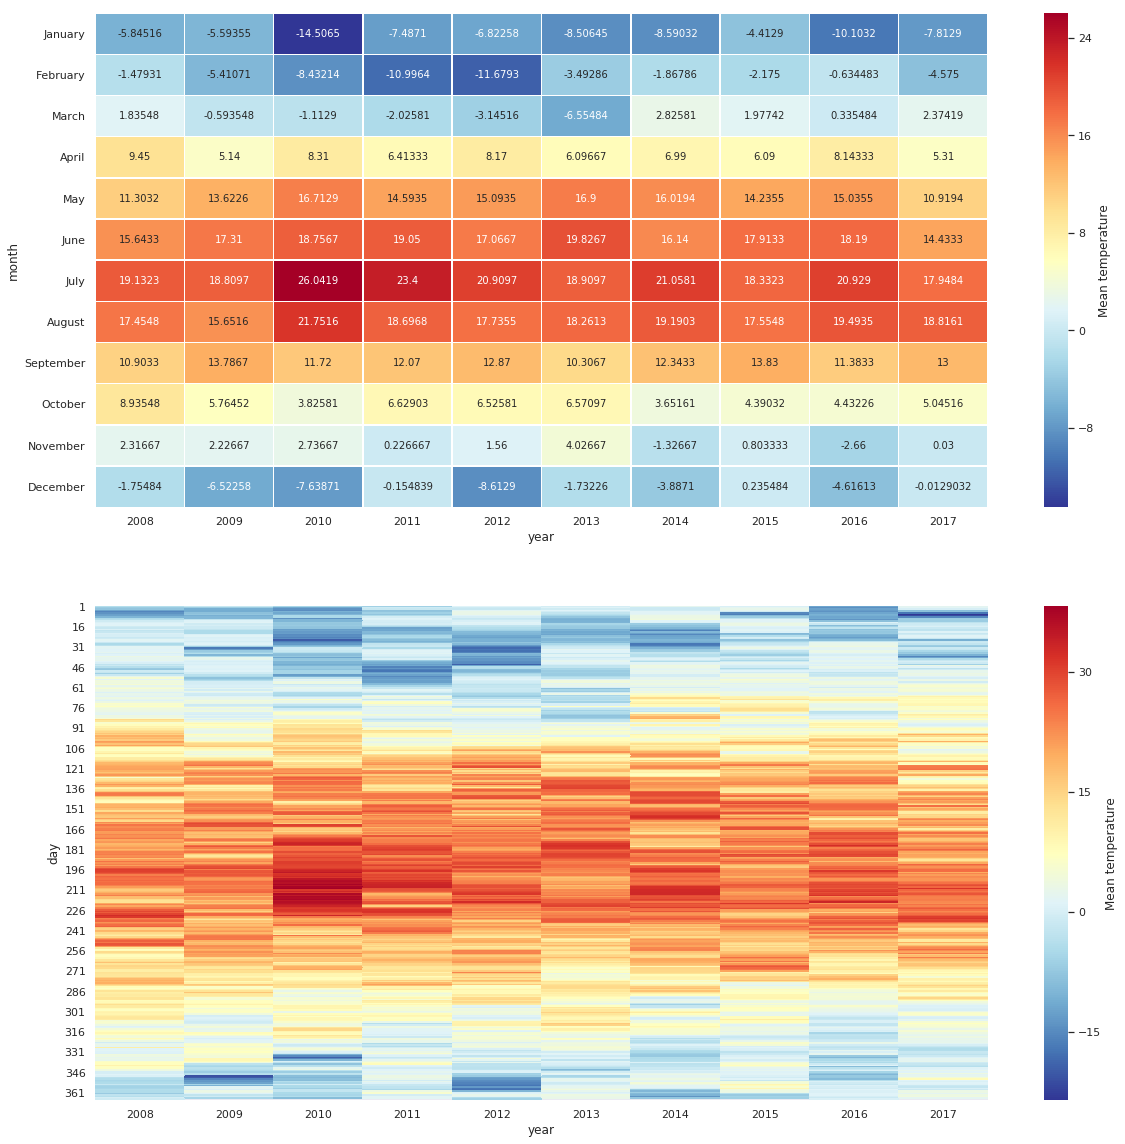

In [167]:
fig, ax = plt.subplots(2,1,figsize=(20,20))
sns.heatmap(month_year, fmt="g",annot=True,linewidths=.5, cmap='RdYlBu_r', cbar_kws={'label': 'Mean temperature'}, ax=ax[0])
sns.heatmap(day_year, fmt="g",yticklabels=15, cmap='RdYlBu_r', cbar_kws={'label': 'Mean temperature'}, ax=ax[1])
plt.show()

Сразу из тепловой карты определяется, то что лето 2010 года было очень жарким. Сразу вспоминаются пожары 2010 года.
<img width = '500px' src="images/summer2010.jpg">
Также очень интересный факт, что средняя температура апреля из года в год то увеличивается, то уменьшается. Наблюдается переодичность.

In [168]:
summer = data[data['season']=='summer']
winter = data[data['season']=='winter']
autumn = data[data['season']=='autumn']
spring = data[data['season']=='spring']

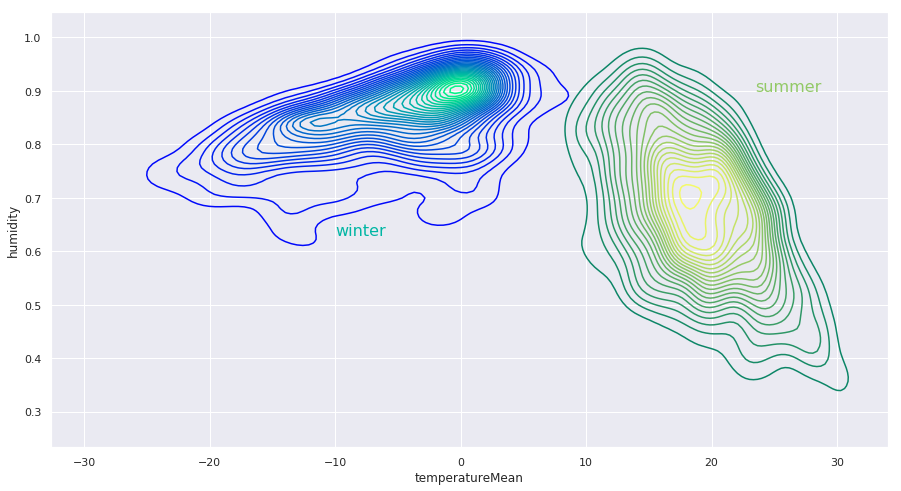

In [169]:
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(15, 8))
ax = sns.kdeplot(summer.temperatureMean, summer.humidity,
                 cmap="summer", shade_lowest=False, n_levels = 30)
ax = sns.kdeplot(winter.temperatureMean, winter.humidity,
                 cmap="winter", shade_lowest=False, n_levels = 30)
summer_color = sns.color_palette("summer")[-3]
winter_color = sns.color_palette("winter")[-2]
ax.text(23.5, 0.9, "summer", size=16, color=summer_color)
ax.text(-10, 0.63, "winter", size=16, color=winter_color)
plt.show()

Зима и лето легко разделяются по средней температуре (что вполне очевидно) и влажности

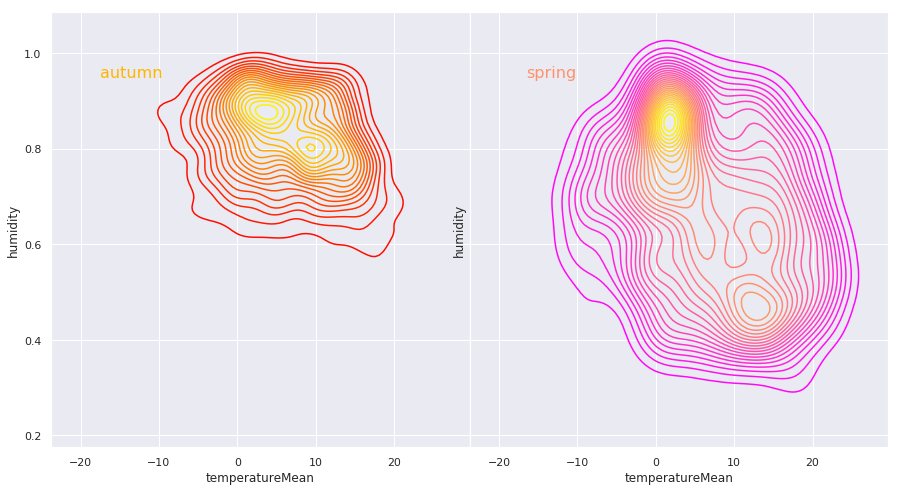

In [170]:
sns.set(style="darkgrid")

f, ax = plt.subplots(1,2, figsize=(15, 8), sharex=True, sharey=True)

sns.kdeplot(autumn.temperatureMean, autumn.humidity,
                 cmap="autumn", shade_lowest=False, n_levels = 25, ax=ax[0])
sns.kdeplot(spring.temperatureMean, spring.humidity,
                 cmap="spring", shade_lowest=False, n_levels = 30, ax=ax[1])
autumn_color = sns.color_palette("autumn")[-2]
spring_color = sns.color_palette("spring")[-3]
ax[0].text(-17.5, 0.95, "autumn", size=16, color=autumn_color)
ax[1].text(-16.5, 0.95, "spring", size=16, color=spring_color)
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.show()

Весну и осень сложно вообще разделить,например по по влажности воздуха и средней температуре не получится.

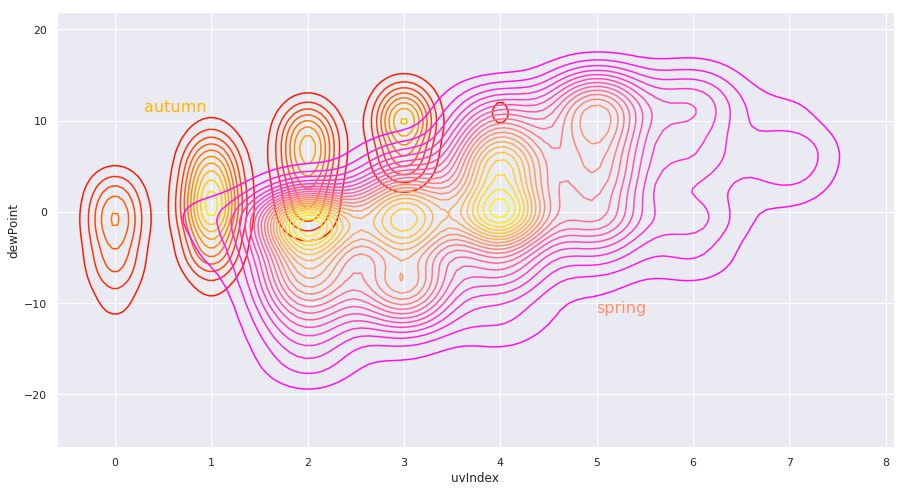

In [171]:
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(15, 8))

sns.kdeplot(autumn.uvIndex, autumn.dewPoint,
                 cmap="autumn", shade_lowest=False, n_levels = 10)
sns.kdeplot(spring.uvIndex, spring.dewPoint,
                 cmap="spring", shade_lowest=False, n_levels = 20)
autumn_color = sns.color_palette("autumn")[-2]
spring_color = sns.color_palette("spring")[-3]
ax.text(0.3, 11, "autumn", size=16, color=autumn_color)
ax.text(5, -11, "spring", size=16, color=spring_color)
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.show()

Но все таки весну и осень неплохо можно разделить по ультрафиолетовому индексу и точке росы.

In [251]:
# Clear data
data_filter = data[['apparentTemperatureHigh','apparentTemperatureLow','apparentTemperatureMax', 'apparentTemperatureMin', 'cloudCover', 'dewPoint', 'humidity',
                   'icon', 'moonPhase', 'precipIntensity', 'precipIntensityMax', 'precipProbability', 'precipType',
                   'precipAccumulation', 'pressure', 'pressureError', 'summary', 'precipitation',
                   'sunriseTime', 'sunsetTime', 'temperatureHigh',
                   'temperatureLow', 'temperatureMax', 'temperatureMin',
                   'uvIndex', 'visibility', 'windBearing', 'windGust','snow_h',
                   'windSpeed', 'month_name', 'day', 'month', 'year', 'season',
                   'temperatureMean', 'apparentTemperatureMean', 'apparentTemperatureDiff', 'temperatureDiff']]

In [173]:
data_clear = data_filter.dropna(axis=1)

In [174]:
data_clear_pairplot = data_clear.drop(['icon','summary',
                                       'sunriseTime', 'sunsetTime',
                                       'month_name','day','pressureError',
                                       'month', 'year', 'season',
                                      'apparentTemperatureHigh','temperatureHigh',
                                      'apparentTemperatureLow','temperatureLow',
                                      'apparentTemperatureMax','temperatureMax',
                                      'apparentTemperatureMin','temperatureMin',
                                      'apparentTemperatureDiff', 'temperatureDiff'], axis=1)

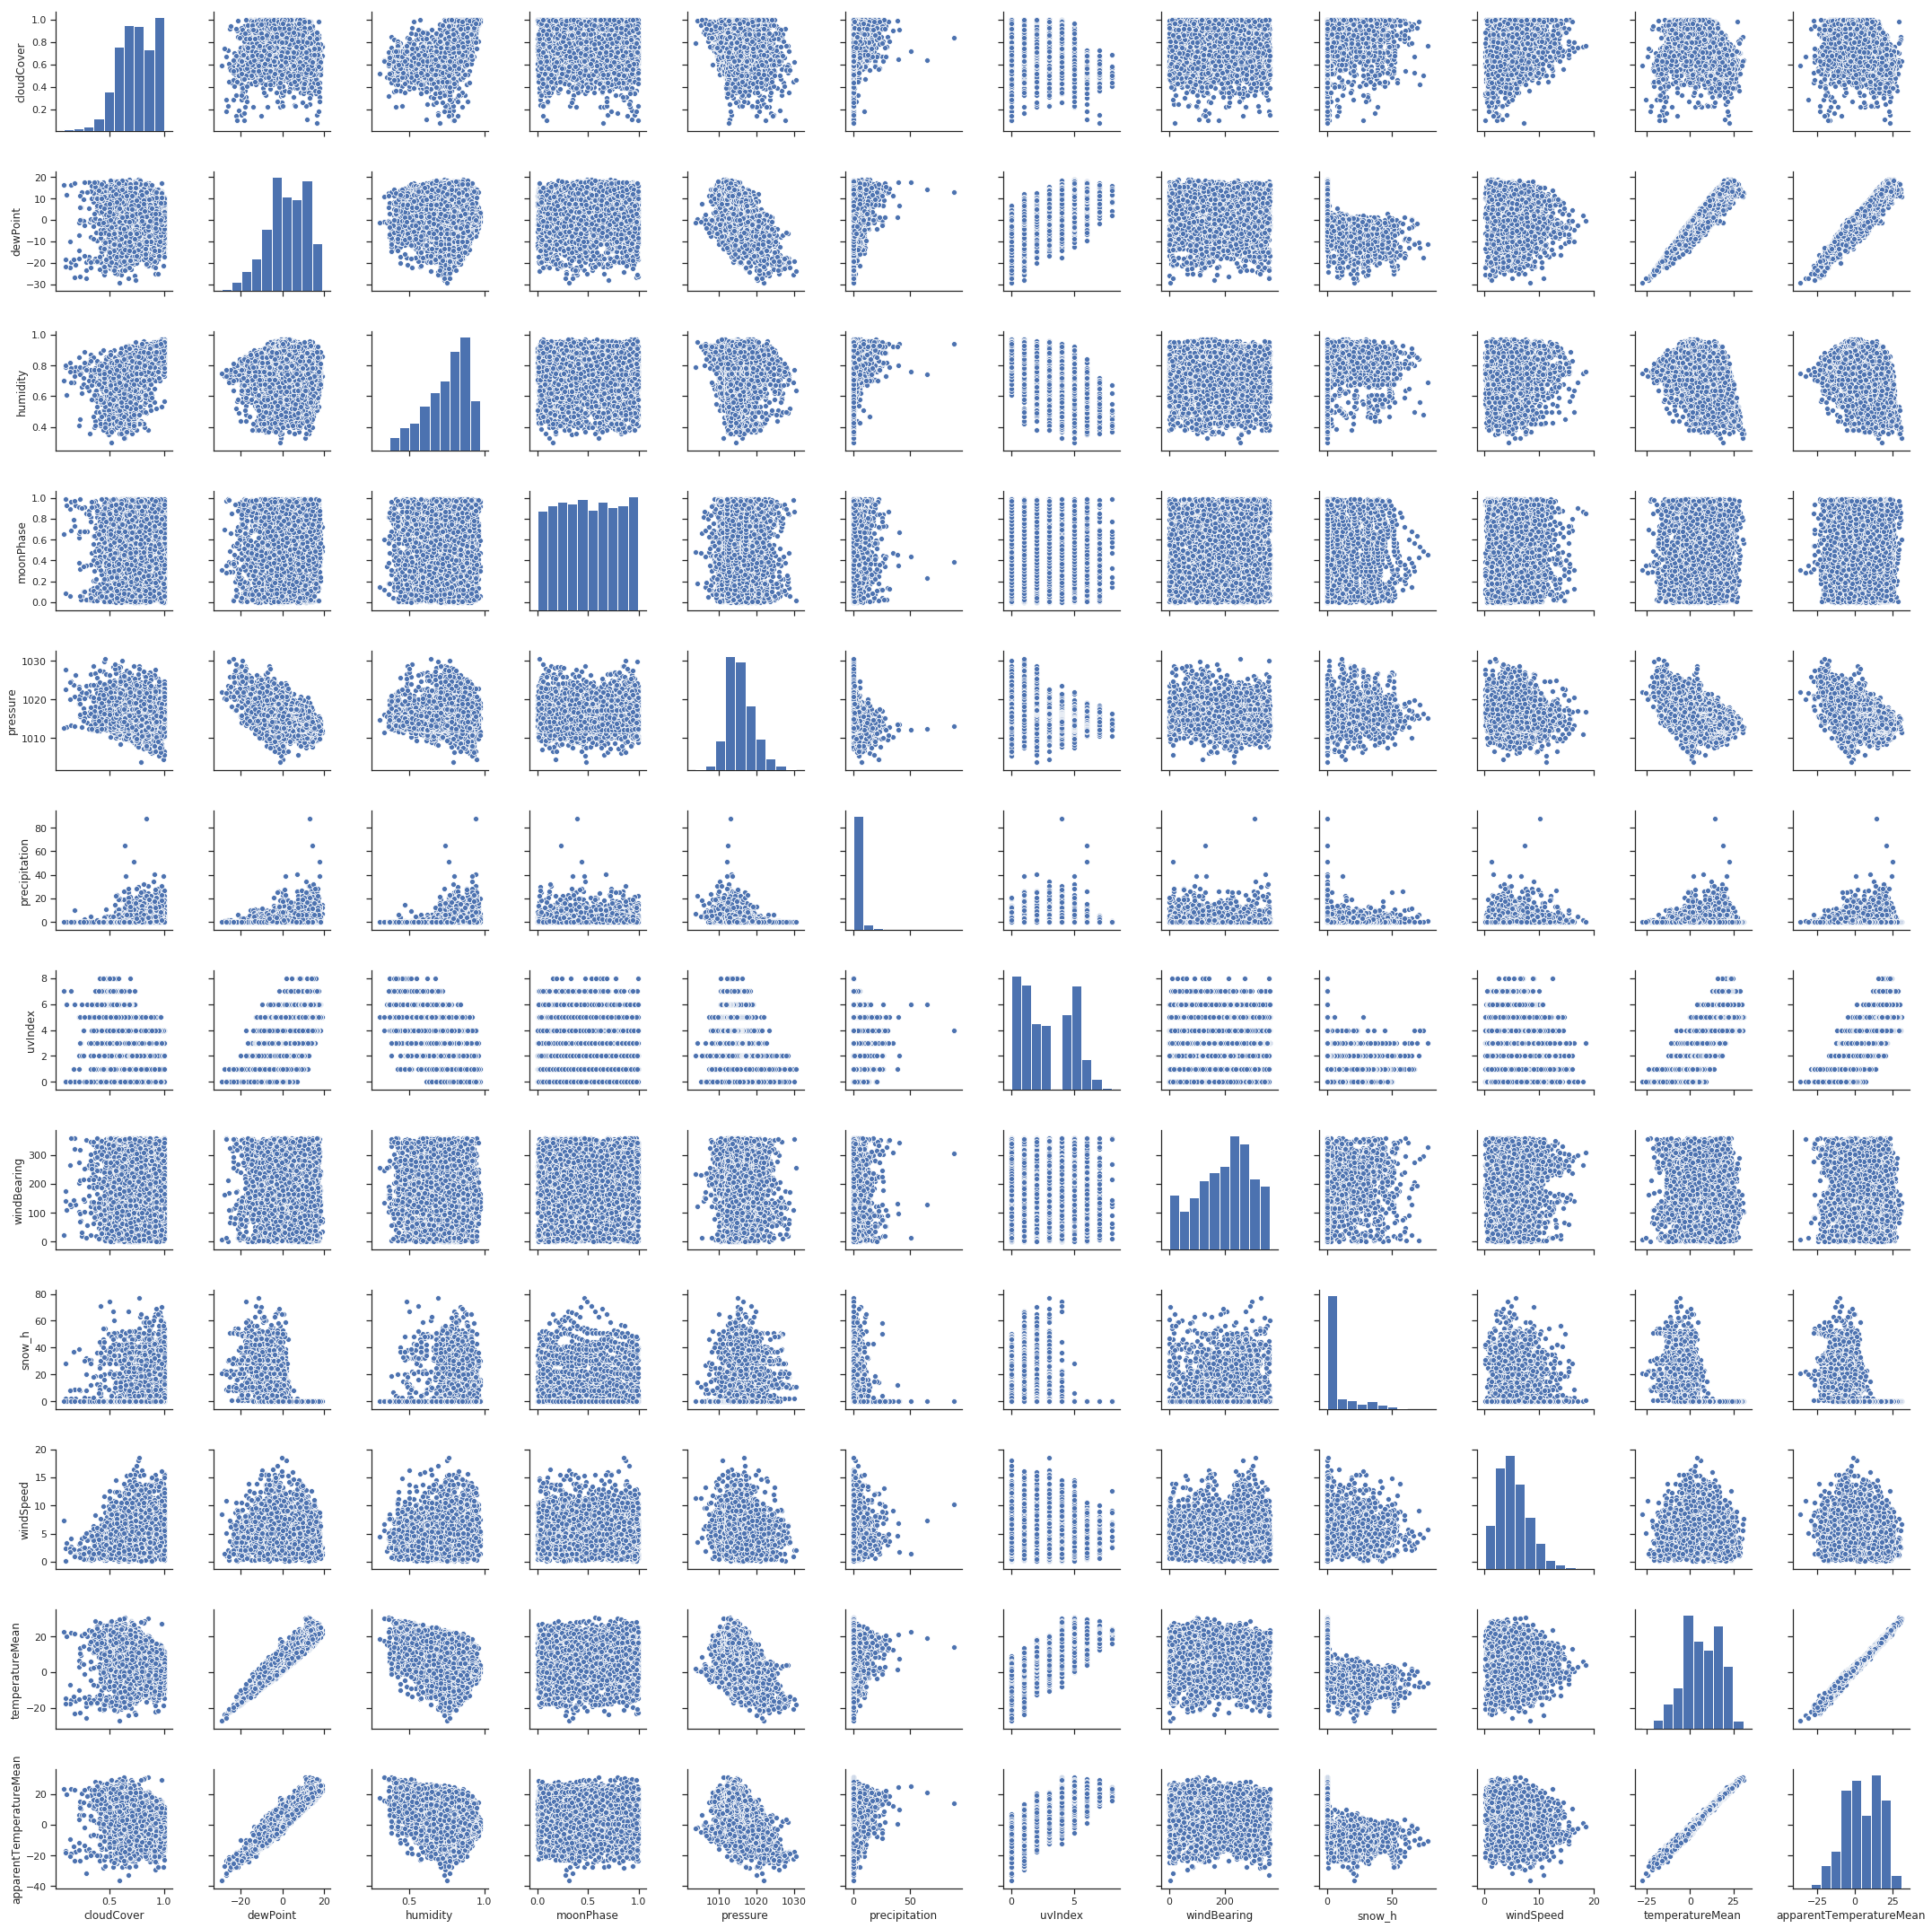

In [175]:
sns.set(style="ticks")
sns.pairplot(data_clear_pairplot)

Средняя температура по ощущениям и средняя температура в течение дня сильно коррелируют друг с другом, что было очевидным. Температура точки росы также сильно коррелирует с ними. Ультрафиальтовый индекс немного коррелирует с температурой, что также верно, ведь в среднем, чем больше ультрафиолетовый индекс, тем больше температура.

In [176]:
data_clear_pairplot.head()

cloudCover   dewPoint  humidity  moonPhase  pressure  \
time                                                               
2008-01-01        0.69 -12.227778      0.82       0.78   1024.78   
2008-01-02        0.93 -10.850000      0.83       0.81   1025.63   
2008-01-03        0.58 -18.066667      0.72       0.84   1028.60   
2008-01-04        0.62 -19.083333      0.77       0.87   1030.00   
2008-01-05        0.58 -20.494444      0.77       0.90   1027.51   

            precipitation  uvIndex  windBearing  snow_h  windSpeed  \
time                                                                 
2008-01-01            0.0        0          113     2.0       1.50   
2008-01-02            0.6        0           85     2.0       4.08   
2008-01-03            0.0        0           75     2.0       4.35   
2008-01-04            0.0        0          355     2.0       2.12   
2008-01-05            0.1        0           55     2.0       1.47   

            temperatureMean  apparentTemperatureMean  
time                                                  
2008-01-01             -9.3                -9.586111  
2008-01-02             -8.4               -12.172222  
2008-01-03            -13.9               -17.830556  
2008-01-04            -15.3               -17.747222  
2008-01-05            -16.8               -18.963889

dewPoint - Температура точки росы газа (точка росы) — значение температуры газа, при которой водяной пар, содержащийся в газе, охлаждаемом изобарически, становится насыщенным над плоской поверхностью воды

### Стандартизованная оценка (z-оценка)

In [177]:
zscores = (data_clear_pairplot - data_clear_pairplot.mean())/data_clear_pairplot.std()
zscores.head()

cloudCover  dewPoint  humidity  moonPhase  pressure  \
time                                                              
2008-01-01   -0.317105 -1.515135  0.529609   0.970392  2.531353   
2008-01-02    1.115948 -1.367066  0.601281   1.074526  2.770576   
2008-01-03   -0.973921 -2.142640 -0.187118   1.178661  3.606449   
2008-01-04   -0.735079 -2.251901  0.171245   1.282795  4.000463   
2008-01-05   -0.973921 -2.403552  0.171245   1.386930  3.299681   

            precipitation   uvIndex  windBearing    snow_h  windSpeed  \
time                                                                    
2008-01-01      -0.444415 -1.293636    -0.893875 -0.406489  -1.335440   
2008-01-02      -0.313901 -1.293636    -1.190359 -0.406489  -0.441002   
2008-01-03      -0.444415 -1.293636    -1.296246 -0.406489  -0.347399   
2008-01-04      -0.444415 -1.293636     1.668593 -0.406489  -1.120497   
2008-01-05      -0.422663 -1.293636    -1.508020 -0.406489  -1.345840   

            temperatureMean  apparentTemperatureMean  
time                                                  
2008-01-01        -1.513173                -1.192250  
2008-01-02        -1.428079                -1.404947  
2008-01-03        -1.948101                -1.870323  
2008-01-04        -2.080471                -1.863469  
2008-01-05        -2.222295                -1.963535

In [178]:
zscores = zscores[['windSpeed', 'temperatureMean', 'pressure', 'humidity', 'cloudCover']]
zscores.head()

windSpeed  temperatureMean  pressure  humidity  cloudCover
time                                                                  
2008-01-01  -1.335440        -1.513173  2.531353  0.529609   -0.317105
2008-01-02  -0.441002        -1.428079  2.770576  0.601281    1.115948
2008-01-03  -0.347399        -1.948101  3.606449 -0.187118   -0.973921
2008-01-04  -1.120497        -2.080471  4.000463  0.171245   -0.735079
2008-01-05  -1.345840        -2.222295  3.299681  0.171245   -0.973921

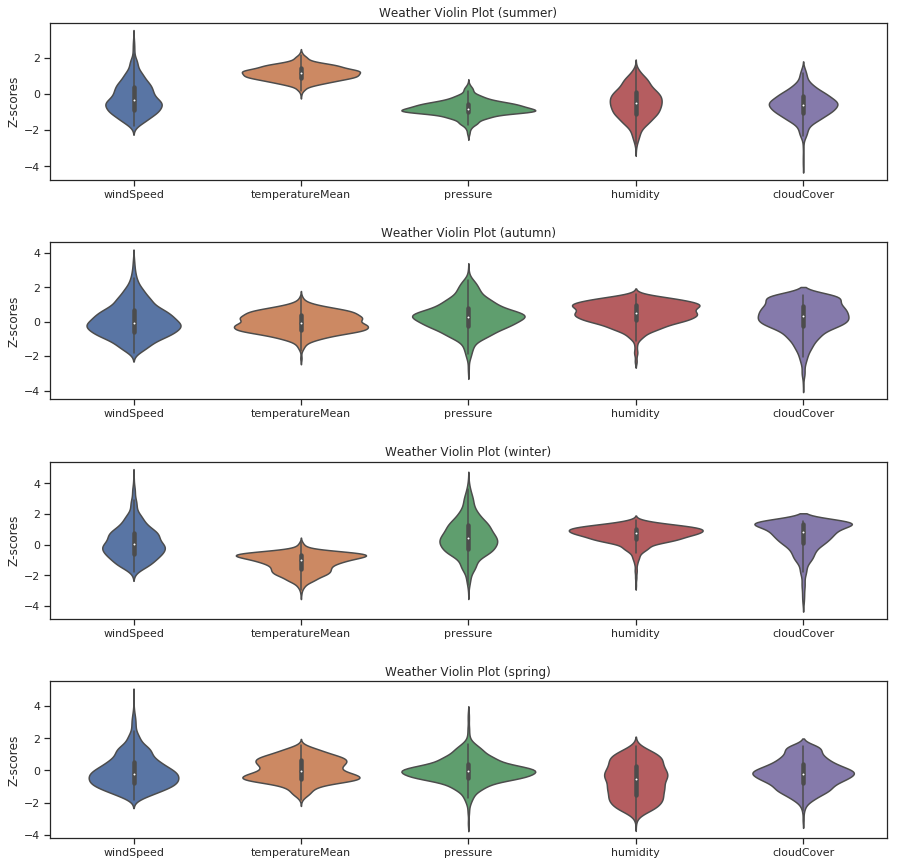

In [179]:
dict_season = {0: 'summer',1: 'autumn',2: 'winter',3: 'spring'}
f, ax = plt.subplots(4,1,figsize=(15, 15))
for i, season_df in enumerate([summer, autumn, winter, spring]):
    ax[i].set_title('Weather Violin Plot (' + dict_season[i] + ')')
    sns.violinplot(data = zscores.loc[season_df.index], split=True, ax=ax[i])
    ax[i].set_ylabel('Z-scores')
plt.subplots_adjust(hspace=0.4) 

Видно, по силуэту z-scores, что: давление весной и осенью имеет нормальное распределение. Также сразу видно как сильно различается зима и лето, и как похожи весна и осень (если посмотреть на z-score средней температуры, но форму и смещение)

In [180]:
# Interacting with IPython Notebook widgets
import matplotlib.pyplot as plt
from IPython.html.widgets import interact

In [181]:
def plot_data(x='day', y='snow_h',
              z='pressure', groupby =  'groupby_day', size=10, cmap='Set1'):
    data_plot = data_clear_pairplot.copy()
    data_plot['month'] = data['month']
    data_plot['day'] = data['day']
    data_plot['month_name'] = data['month_name']
    if groupby == 'groupby_month':
        data_group = data_plot.groupby('month')
        title = 'Month of year'
    else:
        data_group = data_plot.groupby('day')
        title = 'Day of year'
    
    dfx = data_group[x].mean()
    dfy = data_group[y].mean()
    dfz = data_group[z].mean()
    
    plt.figure(figsize=(16,10))

    bubbles = (dfz - dfz.min())/(dfz.max() - dfz.min())
    colors = dfx.index.values
    sc = plt.scatter(dfx, dfy, s= size * bubbles + 9,c = colors,cmap=cmap, label=z, alpha=0.5)
    cbr = plt.colorbar(sc, label=title)
    by_dict = {'groupby_day': 'Day of Year', 'groupby_month':'Month'}
    plt.title('Grouped by ' + by_dict[groupby])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(loc='best')
    plt.show()

In [182]:
data_clear_pairplot['day'] = data['day']
vars = data_clear_pairplot.columns.tolist()
gr = ['groupby_month','groupby_day']
cmaps = [cmap for cmap in plt.cm.datad if not cmap.endswith("_r")]
cmaps.sort()
interact(plot_data, x=vars, y=vars, z=vars, groupby = gr, size=(400,1500), cmap = cmaps)

interactive(children=(Dropdown(description='x', index=12, options=('cloudCover', 'dewPoint', 'humidity', 'moon…

<function __main__.plot_data(x='day', y='snow_h', z='pressure', groupby='groupby_day', size=10, cmap='Set1')>

In [183]:
line_data = data[['temperatureMax', 'temperatureMean', 'temperatureMin', 'dewPoint']]
line_data['year'] = data.year
line_data['month'] = data.month
line_data = line_data.groupby(['year', 'month']).mean()
line_data = pd.DataFrame(line_data.to_records())

line_data['time'] = [str(i) + '-' + str (j) for(i,j) in zip(line_data['year'], line_data['month'])]
line_data.index = line_data.time
line_data = line_data.drop(['year', 'month', 'time'], axis=1)

In [184]:
line_data.head()

temperatureMax  temperatureMean  temperatureMin  dewPoint
time                                                             
2008-1       -3.658065        -5.845161       -7.977419 -8.677778
2008-2        0.593103        -1.479310       -3.713793 -4.570881
2008-3        4.854839         1.835484       -0.932258 -2.480645
2008-4       14.746667         9.450000        3.873333  0.837407
2008-5       16.303226        11.303226        5.938710  3.666308

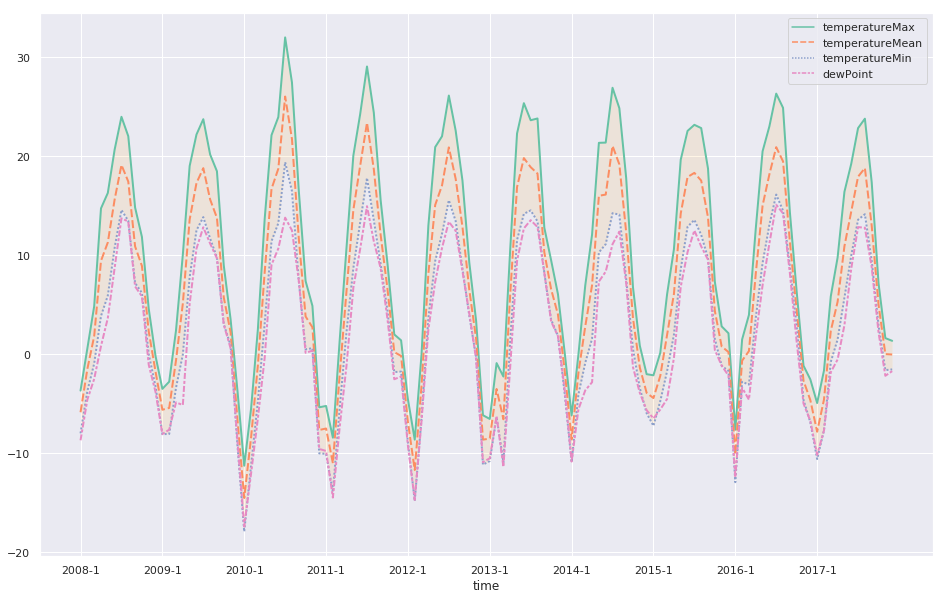

In [185]:
plt.figure(figsize=(16,10))
sns.set(style="darkgrid")
plt.fill_between(line_data.index, line_data['temperatureMax'], line_data['temperatureMin'], facecolor='orange', alpha = 0.1, interpolate=True)
sns.lineplot(data=line_data, palette="Set2",sort = False, linewidth=2)
plt.xticks(np.arange(0, line_data.shape[0], 12))
plt.title('Колебания ежемесячной температуры в Москве в течение 2008 - 2017 года')
plt.show()

### Precipitation

In [186]:
precip = data[['precipIntensityMax', 'precipitation', 'precipType', 'snow_h', 'precipAccumulation', 'day', 'month', 'month_name', 'year','temperatureMean']]

In [187]:
precip.describe()

precipIntensityMax  precipitation       snow_h  precipAccumulation  \
count         2552.000000    3653.000000  3653.000000          397.000000   
mean             0.005268       2.043060     7.656721            0.070985   
std              0.072351       4.597188    13.916052            1.271260   
min              0.000000       0.000000     0.000000            0.000000   
25%              0.000000       0.000000     0.000000            0.000000   
50%              0.000000       0.100000     0.000000            0.000000   
75%              0.000000       2.100000    10.000000            0.000000   
max              1.699700      87.800000    77.000000           25.311000   

               day        month         year  temperatureMean  
count  3653.000000  3653.000000  3653.000000      3653.000000  
mean    183.150287     6.522310  2012.499589         6.704024  
std     105.467566     3.449345     2.873056        10.576465  
min       1.000000     1.000000  2008.000000       -27.400000  
25%      92.000000     4.000000  2010.000000        -0.500000  
50%     183.000000     7.000000  2012.000000         6.400000  
75%     274.000000    10.000000  2015.000000        15.600000  
max     366.000000    12.000000  2017.000000        30.800000

In [188]:
precip.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2008-01-01 to 2017-12-31
Data columns (total 10 columns):
precipIntensityMax    2552 non-null float64
precipitation         3653 non-null float64
precipType            1257 non-null object
snow_h                3653 non-null float64
precipAccumulation    397 non-null float64
day                   3653 non-null int64
month                 3653 non-null int64
month_name            3653 non-null object
year                  3653 non-null int64
temperatureMean       3653 non-null float64
dtypes: float64(5), int64(3), object(2)
memory usage: 473.9+ KB


In [189]:
precip.precipType.fillna('No', inplace=True)

In [190]:
precip.head(10)

precipIntensityMax  precipitation precipType  snow_h  \
time                                                               
2008-01-01                 NaN            0.0       snow     2.0   
2008-01-02                 NaN            0.6       snow     2.0   
2008-01-03                 NaN            0.0       snow     2.0   
2008-01-04                 NaN            0.0       snow     2.0   
2008-01-05                 NaN            0.1       snow     2.0   
2008-01-06                 NaN            0.0       snow     2.0   
2008-01-07                 NaN            0.2       snow     2.0   
2008-01-08                 NaN            0.0       snow     2.0   
2008-01-09                 NaN            0.0       snow     2.0   
2008-01-10                 NaN            0.0       snow     2.0   

            precipAccumulation  day  month month_name  year  temperatureMean  
time                                                                          
2008-01-01                 0.0    1      1    January  2008             -9.3  
2008-01-02                 0.0    2      1    January  2008             -8.4  
2008-01-03                 0.0    3      1    January  2008            -13.9  
2008-01-04                 0.0    4      1    January  2008            -15.3  
2008-01-05                 0.0    5      1    January  2008            -16.8  
2008-01-06                 0.0    6      1    January  2008            -16.3  
2008-01-07                 0.0    7      1    January  2008            -15.7  
2008-01-08                 0.0    8      1    January  2008            -14.8  
2008-01-09                 0.0    9      1    January  2008            -13.8  
2008-01-10                 0.0   10      1    January  2008             -6.6

In [191]:
precip[precip.precipType=='snow'].head()
# где No удаляем все ставим нули
# где rain ставим 0 для снега
# где snow сохраняем все
precip = precip.fillna(0)

In [192]:
precip.precipType.value_counts()
# когда снег, то precipAccumulation
# когда дождь, то precipIntensityMax

No      2396
rain     860
snow     397
Name: precipType, dtype: int64

In [193]:
precip['time'] = [str(i) + '-' + str (j) for(i,j) in zip(precip['year'],precip['month'])]
precip.index = precip.time
precip.head()

precipIntensityMax  precipitation precipType  snow_h  \
time                                                           
2008-1                 0.0            0.0       snow     2.0   
2008-1                 0.0            0.6       snow     2.0   
2008-1                 0.0            0.0       snow     2.0   
2008-1                 0.0            0.0       snow     2.0   
2008-1                 0.0            0.1       snow     2.0   

        precipAccumulation  day  month month_name  year  temperatureMean  \
time                                                                       
2008-1                 0.0    1      1    January  2008             -9.3   
2008-1                 0.0    2      1    January  2008             -8.4   
2008-1                 0.0    3      1    January  2008            -13.9   
2008-1                 0.0    4      1    January  2008            -15.3   
2008-1                 0.0    5      1    January  2008            -16.8   

          time  
time            
2008-1  2008-1  
2008-1  2008-1  
2008-1  2008-1  
2008-1  2008-1  
2008-1  2008-1

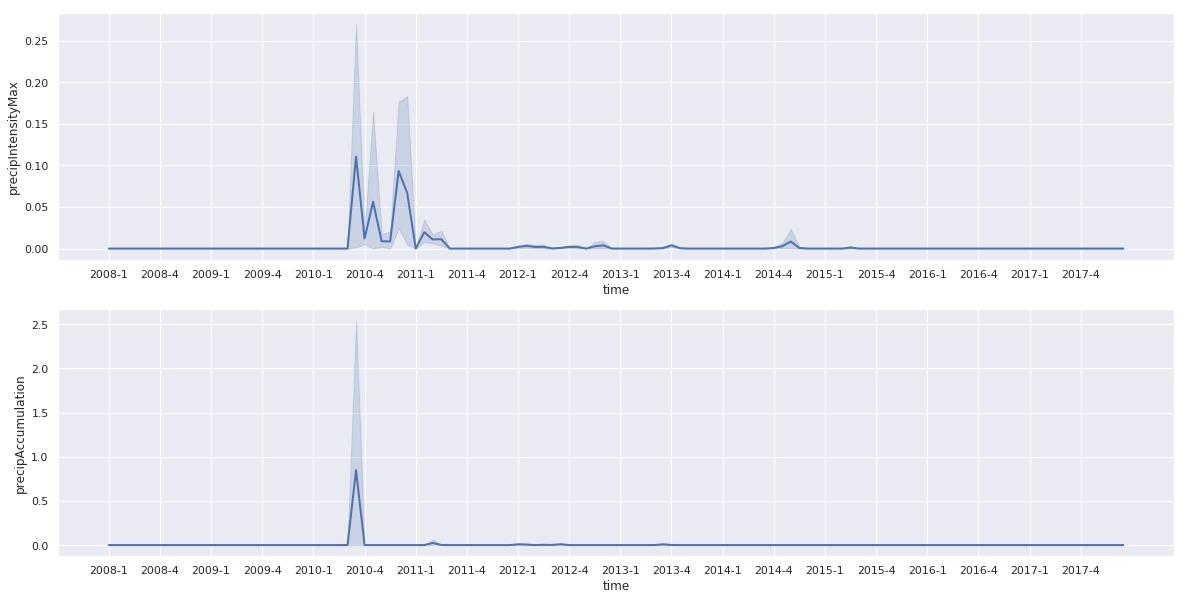

In [194]:
fig = plt.figure(figsize= (20,10))
sns.set(style="darkgrid")

ax1 = fig.add_subplot(211)
sns.lineplot(data=precip.precipIntensityMax, palette="Set2", linewidth=2)
plt.xticks(np.arange(0, line_data.shape[0], 6))
plt.ylabel('precipIntensityMax')
plt.xlabel('time')
ax2 = fig.add_subplot(212) 
sns.lineplot(data=precip.precipAccumulation, palette="Set2", linewidth=2)
plt.xticks(np.arange(0, line_data.shape[0], 6))
plt.ylabel('precipAccumulation')
plt.xlabel('time')
plt.show()

 Данные об осадках не совсем точные и полные, поэтому и пришлось искать более качественные данные
(об этом было сказано в начале статьи)
Всероссийский научно-исследовательский институт гидрометеорологической информации – Мировой центр данных (ВНИИГМИ-МЦД) (с метеостации - ВДНХ).

![api_weather](images/2.png)

 http://meteo.ru/data/162-temperature-precipitation  
 http://aisori-m.meteo.ru/waisori/index1.xhtml

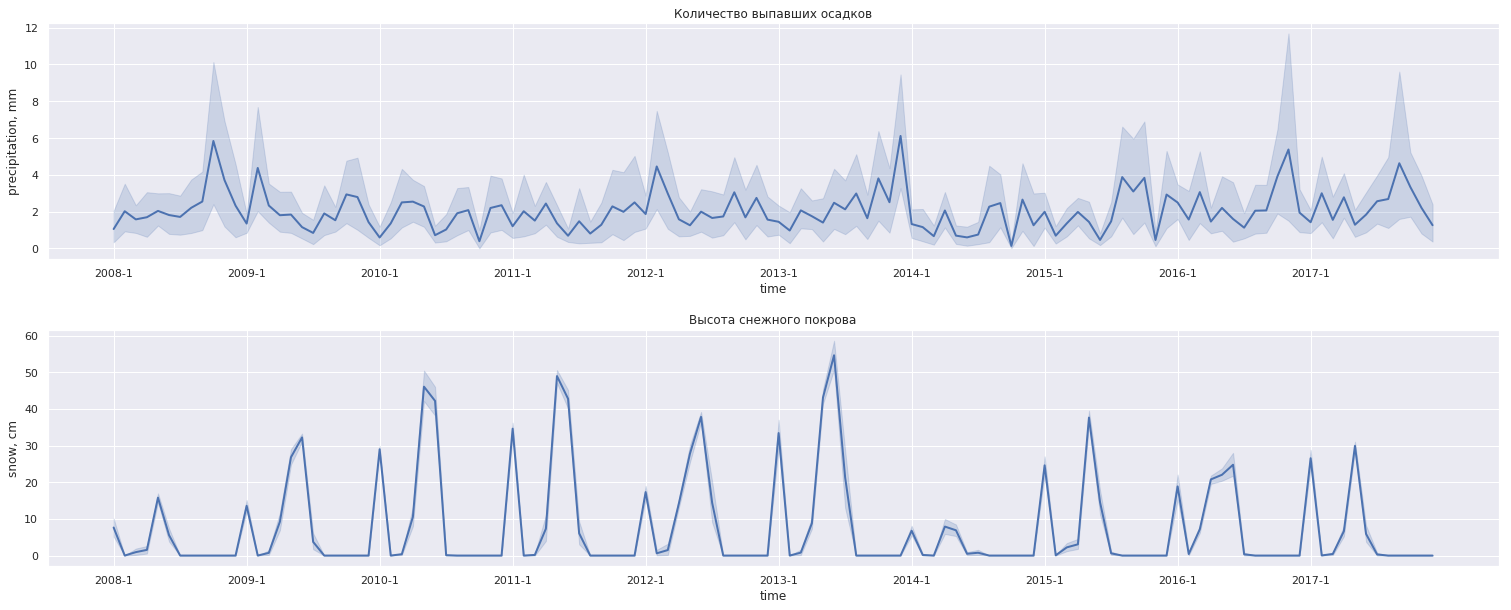

In [195]:
fig = plt.figure(figsize= (26,10))
sns.set(style="darkgrid")

ax1 = fig.add_subplot(211)
sns.lineplot(data=precip.precipitation, palette="Set2", linewidth=2)
plt.xticks(np.arange(0, line_data.shape[0], 12))
plt.title('Количество выпавших осадков')
plt.ylabel('precipitation, mm')
plt.xlabel('time')

ax2 = fig.add_subplot(212)
sns.lineplot(data=precip.snow_h, palette="Set2", linewidth=2)
plt.xticks(np.arange(0, line_data.shape[0], 12))
plt.title('Высота снежного покрова')
plt.ylabel('snow, cm')
plt.xlabel('time')
plt.subplots_adjust(hspace=0.3)    
plt.show()

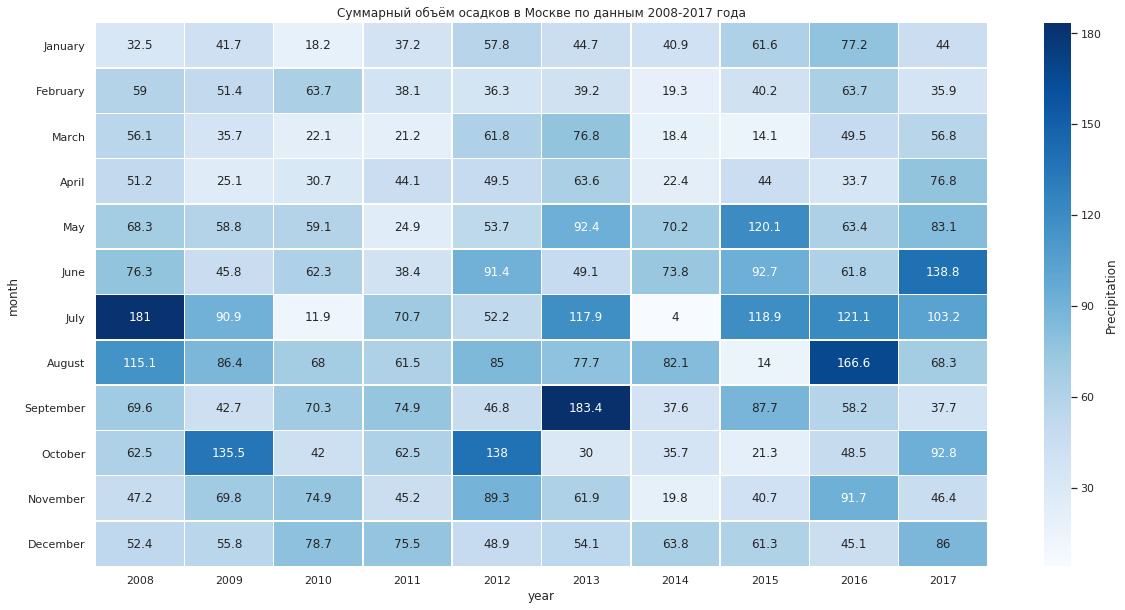

In [277]:
prec_month_year = data.pivot_table('precipitation','month','year', aggfunc=np.sum)
prec_month_year['month'] = new_index
prec_month_year.index = prec_month_year.month
prec_month_year = prec_month_year.drop(['month'], axis = 1)

fig, ax = plt.subplots(figsize=(20,10))
plt.title("Суммарный объём осадков в Москве по данным 2008-2017 года")
sns.heatmap(prec_month_year, fmt="g",annot=True,linewidths=.5, cmap='Blues', cbar_kws={'label': 'Precipitation'})
plt.show()

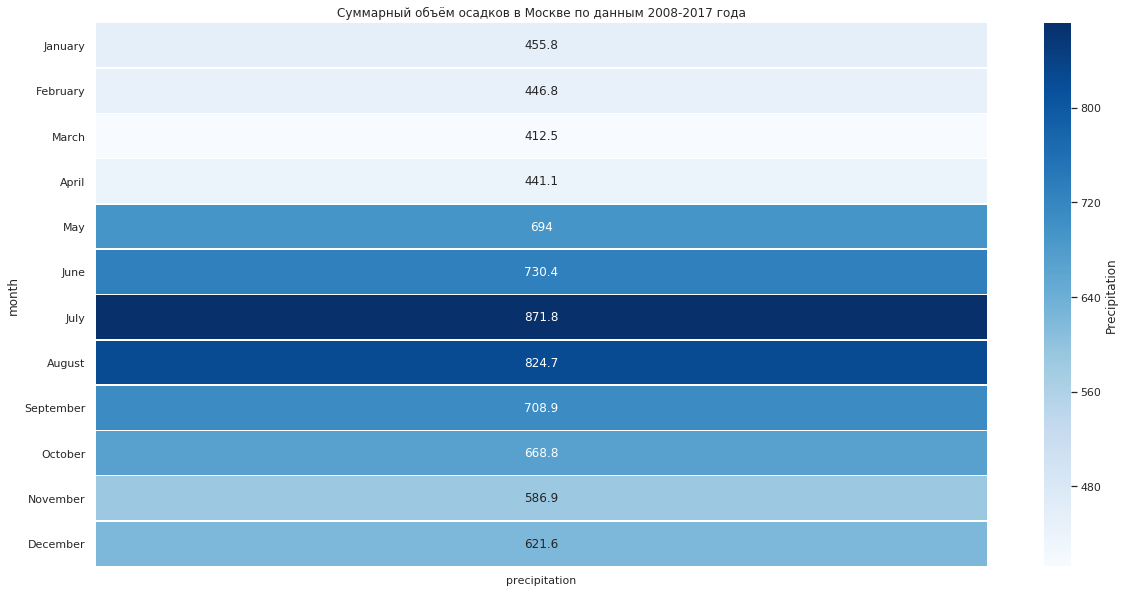

In [279]:
prec_month = data.pivot_table('precipitation','month', aggfunc=np.sum)
prec_month['month'] = new_index
prec_month.index = prec_month.month
prec_month = prec_month.drop(['month'], axis = 1)
fig, ax = plt.subplots(figsize=(20,10))
plt.title("Суммарный объём осадков в Москве по данным 2008-2017 года")
sns.heatmap(prec_month, fmt="g",annot=True,linewidths=.5, cmap='Blues', cbar_kws={'label': 'Precipitation'})
plt.show()

Из тепловой карты видно, что самым сухим месяцем в году является март, а наибольшее количество осадков выпадает в июле. Отметим, что этот результат согласуется с данными из Википедии (https://ru.wikipedia.org/wiki/Климат_Москвы).

### Другие построения

In [196]:
def boxplot_data(x='snow_h', y ='month'):
    data_plot = data_box_plot.copy()
    data_plot['year'] = data['year']
    data_plot['month_name'] = data['month_name']
    y_name = y
    if y=='month':
        y = 'month_name'
    plt.figure(figsize=(16,10))
    sns.boxplot(y=y, x=x, data=data_plot, orient="h")
    plt.xlabel(x)
    plt.ylabel(y_name)
    plt.show()

In [197]:
data_box_plot = data_clear_pairplot
data_box_plot = data_box_plot.drop(['day'], axis=1)

In [198]:
data_box_plot.head()

cloudCover   dewPoint  humidity  moonPhase  pressure  \
time                                                               
2008-01-01        0.69 -12.227778      0.82       0.78   1024.78   
2008-01-02        0.93 -10.850000      0.83       0.81   1025.63   
2008-01-03        0.58 -18.066667      0.72       0.84   1028.60   
2008-01-04        0.62 -19.083333      0.77       0.87   1030.00   
2008-01-05        0.58 -20.494444      0.77       0.90   1027.51   

            precipitation  uvIndex  windBearing  snow_h  windSpeed  \
time                                                                 
2008-01-01            0.0        0          113     2.0       1.50   
2008-01-02            0.6        0           85     2.0       4.08   
2008-01-03            0.0        0           75     2.0       4.35   
2008-01-04            0.0        0          355     2.0       2.12   
2008-01-05            0.1        0           55     2.0       1.47   

            temperatureMean  apparentTemperatureMean  
time                                                  
2008-01-01             -9.3                -9.586111  
2008-01-02             -8.4               -12.172222  
2008-01-03            -13.9               -17.830556  
2008-01-04            -15.3               -17.747222  
2008-01-05            -16.8               -18.963889

In [199]:
vars = data_box_plot.columns.tolist()
interact(boxplot_data, x=vars, y=['month','year'])

interactive(children=(Dropdown(description='x', index=8, options=('cloudCover', 'dewPoint', 'humidity', 'moonP…

<function __main__.boxplot_data(x='snow_h', y='month')>

In [200]:
# В итоге для анализа возьмём следующие признаки, так они являются наиболее
# информативными, а проблема с точностью данных об осадками была решена:
weather = data[['apparentTemperatureMax', 'apparentTemperatureMean', 'apparentTemperatureDiff',
                'apparentTemperatureMin', 'cloudCover', 'dewPoint', 'humidity', 
                'icon', 'moonPhase', 'pressure', 'summary',
                'temperatureMax', 'temperatureMean','temperatureDiff',  'temperatureMin',
                'uvIndex', 'visibility', 'windBearing', 'windGust',
                'windSpeed', 'month_name', 'day', 'month', 'year', 'precipitation',
                'snow_h', 'season']]

In [201]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2008-01-01 to 2017-12-31
Data columns (total 27 columns):
apparentTemperatureMax     3653 non-null float64
apparentTemperatureMean    3653 non-null float64
apparentTemperatureDiff    3653 non-null float64
apparentTemperatureMin     3653 non-null float64
cloudCover                 3653 non-null float64
dewPoint                   3653 non-null float64
humidity                   3653 non-null float64
icon                       3653 non-null object
moonPhase                  3653 non-null float64
pressure                   3653 non-null float64
summary                    3653 non-null object
temperatureMax             3653 non-null float64
temperatureMean            3653 non-null float64
temperatureDiff            3653 non-null float64
temperatureMin             3653 non-null float64
uvIndex                    3653 non-null int64
visibility                 3477 non-null float64
windBearing                3653 non-null int64

In [202]:
# windGust -неполные данные (порыв ветра)
# summary - категориальные данные
# icon - категориальные данные
# visibility -неполные данные (видимость)

In [203]:
# заполним пропуски для windGust и visibility средним по месяцу (так будет точнее в плане статистики)
weather_tmp = weather[weather['month'] == 1].fillna(weather[weather.month == 1].mean())
for i in range(2, 13):
    weather_tmp = pd.concat([weather_tmp, weather[weather['month'] == i].fillna(weather[weather.month == i].mean())])
weather = weather_tmp.sort_values(by=['time'])

In [204]:
# 144 различных значений признака
weather.summary.value_counts()

Mostly cloudy throughout the day.                                                                   2174
Overcast throughout the day.                                                                         292
Foggy in the morning.                                                                                252
Foggy overnight.                                                                                     120
Partly cloudy throughout the day.                                                                     93
Mostly cloudy until evening.                                                                          63
Foggy until afternoon.                                                                                57
Foggy starting in the evening.                                                                        49
Foggy throughout the day.                                                                             35
Mostly cloudy starting in the afternoon.               

In [205]:
# 9 значений признака
weather.icon.value_counts()

partly-cloudy-day      2363
fog                     614
cloudy                  293
wind                    213
partly-cloudy-night      86
rain                     76
snow                      6
clear-day                 1
sleet                     1
Name: icon, dtype: int64

In [206]:
def violinplot_data(y ='windGust'):
    data_plot = weather.copy()
    fig = plt.figure(figsize=(16,10))
    
    ax1 = fig.add_subplot(211)
    sns.violinplot(y=y, x='icon', split = True, data=data_plot)
    
    ax2 = fig.add_subplot(212)
    sns.countplot(data_plot['icon'])
    plt.show()

In [207]:
data_violinplot = weather
data_violinplot = data_violinplot.drop(['season', 'icon','month', 'year','month_name', 'day', 'summary'], axis=1)

In [208]:
vars = data_violinplot.columns.tolist()
interact(violinplot_data, y=vars)

interactive(children=(Dropdown(description='y', index=16, options=('apparentTemperatureMax', 'apparentTemperat…

<function __main__.violinplot_data(y='windGust')>

Исходя из диаграммы видно, что в основном погода в Москве облачная, часто возникает туман. На это есть две основные причины. Первая причина – это расположение города (Москва находится в средних широтах, ближе к центру континента. Именно здесь активизируются воздушные массы, несущие с запада на восток осадки и большую облачность). Вторая причина – не очень благоприятная экологическая обстановка.

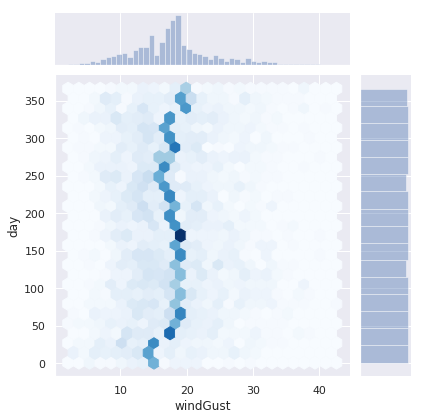

In [210]:
sns.jointplot(x='windGust', y='day',data = weather, gridsize = 25,cmap ='Blues', kind='hex')

Порывы ветра в Москве в среднем около 15-20 метров в секунду

In [211]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2008-01-01 to 2017-12-31
Data columns (total 27 columns):
apparentTemperatureMax     3653 non-null float64
apparentTemperatureMean    3653 non-null float64
apparentTemperatureDiff    3653 non-null float64
apparentTemperatureMin     3653 non-null float64
cloudCover                 3653 non-null float64
dewPoint                   3653 non-null float64
humidity                   3653 non-null float64
icon                       3653 non-null object
moonPhase                  3653 non-null float64
pressure                   3653 non-null float64
summary                    3653 non-null object
temperatureMax             3653 non-null float64
temperatureMean            3653 non-null float64
temperatureDiff            3653 non-null float64
temperatureMin             3653 non-null float64
uvIndex                    3653 non-null int64
visibility                 3653 non-null float64
windBearing                3653 non-null int64

In [212]:
# категориальные признаки уберем, в данной задаче для анализа они нам не потребуются 
weather = weather.drop(['icon','summary'], axis = 1)

In [213]:
weather.columns

Index(['apparentTemperatureMax', 'apparentTemperatureMean',
       'apparentTemperatureDiff', 'apparentTemperatureMin', 'cloudCover',
       'dewPoint', 'humidity', 'moonPhase', 'pressure', 'temperatureMax',
       'temperatureMean', 'temperatureDiff', 'temperatureMin', 'uvIndex',
       'visibility', 'windBearing', 'windGust', 'windSpeed', 'month_name',
       'day', 'month', 'year', 'precipitation', 'snow_h', 'season'],
      dtype='object')

In [214]:
weather.head()
weather.to_csv('data_SARIMAX.csv')

### Статистические гипотезы

* Проверка статистических гипотез (8 баллов) - сформулировать статистические гипотезы в данных и проверить их с помощью статистических критериев (например - если это временной ряд, то изучить, изменились ли средние до и после определённого периода, или можно сравнить данные из разных групп). Как минимум – проверить 2 статистические гипотезы, должен быть использован любой параметрический и любой непараметрический критерий. Каждый шаг должен сопровождаться комментариями (если используете параметрический критерий, обязательно показывать, что его использование допустимо и корректно), должны быть сделаны выводы. 

In [215]:
from scipy import stats

### Критерий Стьюдента для несвязанных выборок
Частный случай дисперсионного анализа - применение критерия Стьюдента, позволяет проверять значимость различий двух групп.  

**t** = $ \frac{\text{Разность выборочных средних}} {\text{Стандартная ошибка разности выборочных средних} } = \frac{\overline{X_1}-\overline{X_2}} {{S_{\overline{X_1} - \overline{X_2}}}}  = \frac{\overline{X_1}-\overline{X_2}} { \sqrt{ S_{\overline{X_1}}^2 +  S_{\overline{X_2}}^2 } } = \frac{\overline{X_1}-\overline{X_2}} { \sqrt{ \frac{S_1^2} {n_1} +  \frac{S_2^2} {n_2} } } $


Нулевая гипотеза: средние дневные температуры в разные сезоны (2 случая: зима и лето, весна и осень), усредненные за 2008-2017 года схожи друг с другом

In [254]:
w_stt_one = pd.DataFrame(weather[weather.season=='summer'].groupby(['day']).mean()).reset_index()
w_stt_two = pd.DataFrame(weather[weather.season=='spring'].groupby(['day']).mean()).reset_index()
w_stt_three = pd.DataFrame(weather[weather.season=='winter'].groupby(['day']).mean()).reset_index()
w_stt_four = pd.DataFrame(weather[weather.season=='autumn'].groupby(['day']).mean()).reset_index()

sample_one = list(w_stt_one.temperatureMean.values)
sample_two = list(w_stt_two.temperatureMean.values)
sample_three = list(w_stt_three.temperatureMean.values)
sample_four = list(w_stt_four.temperatureMean.values)

print('summer_n =', len(sample_one))
print('spring_n =', len(sample_two))
print('winter_n =', len(sample_three))
print('autumn_n =', len(sample_four))

summer_n = 93
spring_n = 93
winter_n = 92
autumn_n = 92


### Проверка на нормальность

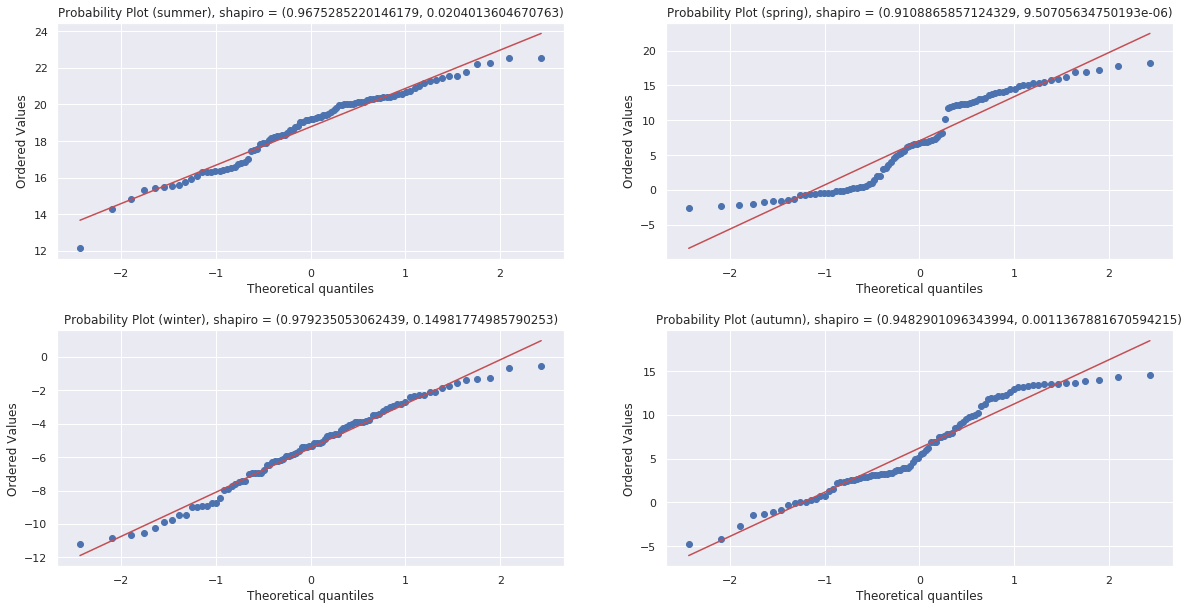

In [255]:
#c помощью Q-Q графика

fig = plt.figure(figsize= (20,10))

ax1 = fig.add_subplot(221)
stats.probplot(sample_one, dist = "norm", plot = plt)
plt.title('Probability Plot (summer), shapiro = '+str(stats.shapiro(sample_one)))

ax2 = fig.add_subplot(222)
stats.probplot(sample_two, dist = "norm", plot = plt)
plt.title('Probability Plot (spring), shapiro = '+str(stats.shapiro(sample_two)))

ax3 = fig.add_subplot(223)
stats.probplot(sample_three, dist = "norm", plot = plt)
plt.title('Probability Plot (winter), shapiro = '+str(stats.shapiro(sample_three)))

ax4 = fig.add_subplot(224)
stats.probplot(sample_four, dist = "norm", plot = plt)
plt.title('Probability Plot (autumn), shapiro = '+str(stats.shapiro(sample_four)))
plt.subplots_adjust(hspace=0.3)    

plt.show()

### Распределения не являются нормальными, поэтому и критерий этот применять нельзя
### Попробуем его применить, но так делать нельзя!
### Поэтому в дальнейшем мы применим к этим выборках другой критерий

In [218]:
stats.ttest_ind(sample_one, sample_three)

Ttest_indResult(statistic=69.46038731552206, pvalue=1.884194728547289e-133)

Значение 69.46 больше чем значение 3,35 следовательно уровень значимости меньше 0,001.  
Если уровень значимости меньше 0,05 делается вывод о наличи различий между группами. Таким образом между двумя группами есть различия в средней дневной температуре зимой и летом.

In [219]:
stats.ttest_ind(sample_two, sample_four)

Ttest_indResult(statistic=0.9861215132137066, pvalue=0.3253754905908536)

Значение 0.986 меньше чем значение 1,972 следовательно уровень значимости больше 0,05.
Если уровень значимости больше 0,05 делается вывод, что между двумя группами нет различий в средней дневной температуре весной и осенью.

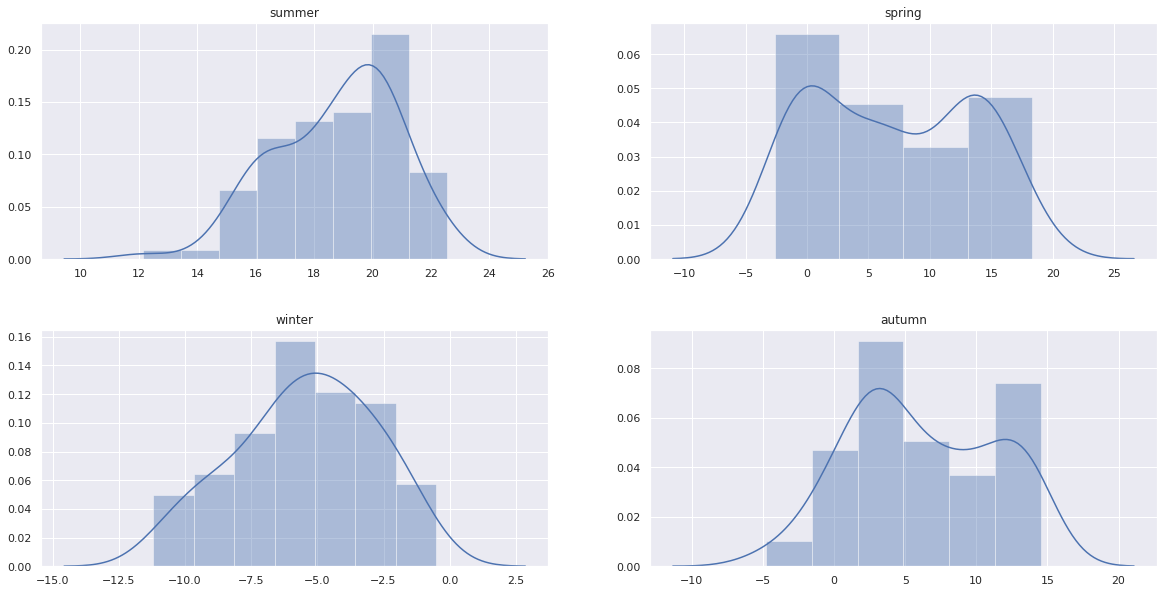

In [220]:
fig = plt.figure(figsize= (20,10))

ax1 = fig.add_subplot(221)
ax1 = sns.distplot(sample_one)
plt.title('summer')

ax2 = fig.add_subplot(222)
ax2 = sns.distplot(sample_two)
plt.title('spring')

ax3 = fig.add_subplot(223)
ax3 = sns.distplot(sample_three)
plt.title('winter')

ax4 = fig.add_subplot(224)
ax4 = sns.distplot(sample_four)
plt.title('autumn')
plt.subplots_adjust(hspace=0.3)    
plt.show()


### Ранговые критерии

Знаковые критерии выбрасывают большую часть информации, вместо значений используют лишь бинарный вектор, ранговые критерии сохрнаяют больше информации. Ранг - позиция элемента в вариационном ряду. 

### Критерий Манна-Уитни

U-критерий Манна — Уитни ( англ. Mann — Whitney U-test) — статистический критерий, используемый для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно. Позволяет выявлять различия в значении параметра между малыми выборками.


По таблице для избранного уровня статистической значимости определить критическое значение критерия для данных
${\displaystyle n_{1}}$
и
${\displaystyle n_{2}}$
. Если полученное значение
${\displaystyle U}$
меньше табличного или равно ему, то признается наличие существенного различия между уровнем признака в рассматриваемых выборках (принимается альтернативная гипотеза). Если же полученное значение
${\displaystyle U}$
больше табличного, принимается нулевая гипотеза. Достоверность различий тем выше, чем меньше значение
${\displaystyle U}$

In [221]:
stats.mannwhitneyu(sample_one, sample_three)
# Отвергается нулевая гипотеза
# Зима и лето различны

MannwhitneyuResult(statistic=0.0, pvalue=3.7025360755808166e-32)

In [222]:
stats.mannwhitneyu(sample_two, sample_four)
# Принимается нулевая гипотеза
# Весна и осень похожи друг на друга

MannwhitneyuResult(statistic=4011.0, pvalue=0.23214338198741669)

Нулевая гипотеза: выборка из средних температур в течение 2008 и 2017 года схожи

In [223]:
w_mannw = pd.DataFrame(weather.groupby(['year', 'month']).mean()).reset_index()
sample_one = list(w_mannw[w_mannw.year == 2008].temperatureMean.values)
sample_two = list(w_mannw[w_mannw.year == 2017].temperatureMean.values)
print(sample_one)
print(sample_two)

[-5.845161290322579, -1.4793103448275862, 1.8354838709677421, 9.449999999999998, 11.303225806451614, 15.643333333333334, 19.132258064516126, 17.45483870967742, 10.90333333333333, 8.935483870967742, 2.316666666666666, -1.7548387096774196]
[-7.81290322580645, -4.575000000000001, 2.374193548387096, 5.31, 10.919354838709676, 14.433333333333334, 17.94838709677419, 18.816129032258065, 13.000000000000004, 5.045161290322581, 0.029999999999999746, -0.012903225806451589]


In [224]:
stats.mannwhitneyu(sample_one,sample_two)

MannwhitneyuResult(statistic=70.0, pvalue=0.46549372327978356)

12 * 12   
27 - 1%  
37 - 5% 

Принимается нулевая гипотеза 70 > 37. Существенных различий нет.

### Доверительные интервалы

Задача про изменение средней температуры летом (сравнивается 2011 год и 2017 год)

In [249]:
sample_one = list(weather[weather.year == 2011][weather.season == 'summer'].temperatureMean.values)
sample_two = list(weather[weather.year == 2017][weather.season == 'summer'].temperatureMean.values)

/home/evgenii/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/evgenii/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


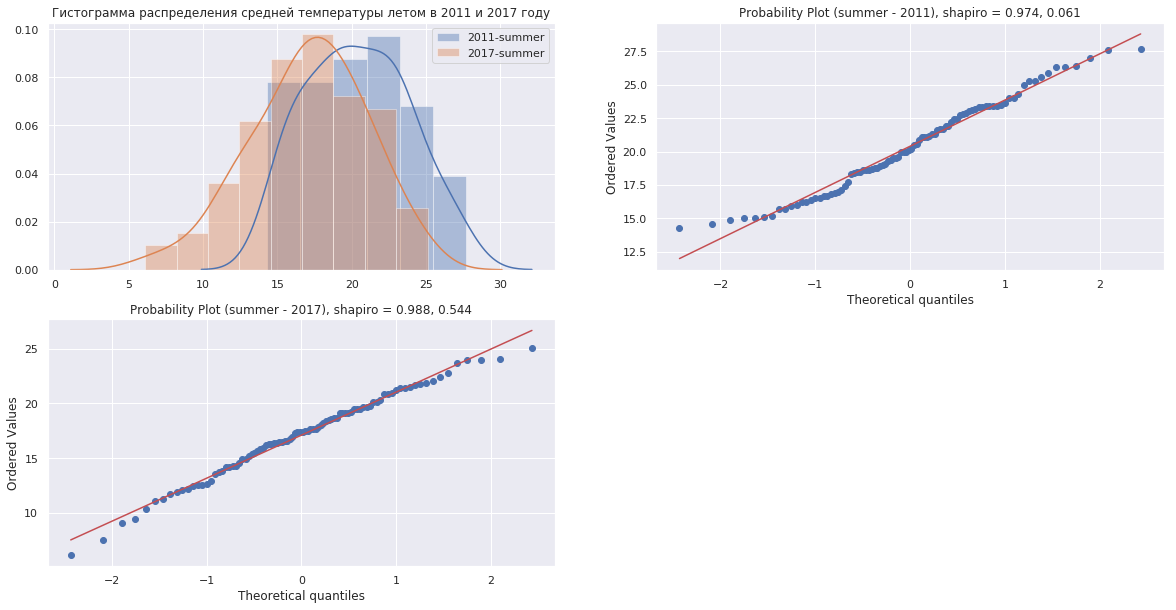

In [250]:
fig = plt.figure(figsize= (20,10))

ax1 = fig.add_subplot(221)
sns.distplot(sample_one, label  = '2011-summer')
sns.distplot(sample_two, label = '2017-summer')
plt.legend()
plt.title('Гистограмма распределения средней температуры летом в 2011 и 2017 году')

ax2 = fig.add_subplot(222)
stats.probplot(sample_one, dist = "norm", plot = plt)
plt.title('Probability Plot (summer - 2011), shapiro = '+ str(round(stats.shapiro(sample_one)[0], 3))+", "+str(round(stats.shapiro(sample_one)[1], 3)))

ax3 = fig.add_subplot(223)
stats.probplot(sample_two, dist = "norm", plot = plt)
plt.title('Probability Plot (summer - 2017), shapiro = '+ str(round(stats.shapiro(sample_two)[0], 3))+", "+str(round(stats.shapiro(sample_two)[1], 3)))
plt.show()

In [227]:
#Расчет для задачи про изменение средней температуры летом
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(sample_one), sms.DescrStatsW(sample_two))
print (cm.tconfint_diff(usevar='unequal',alpha=0.01))

(1.8900555940826413, 4.7142922320043095)


То есть, с 99% вероятностью можно утверждать,что в 2017 году средняя температура летом по сравнению с 2011 годом уменьшилась от 1.89 до 4.71 градусов (все помним жару 2010 и 2011 года)

## Model   

* Построить предсказание временного ряда (5 баллов). 

* Сделать выводы о проделанном исследовании (3 балла) - указать, какие инсайты были найдены, о чем свидетельствует сделанный прогноз и выводы, полученные в ходе проверки статистических гипотез.

### Предсказание временного ряда  (temperatureMean)

In [228]:
import statsmodels.api as sm
from pylab import rcParams
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

### Будем прогнозировать среднюю температуру месяца

In [229]:
weather_m = pd.DataFrame(weather.groupby(['year', 'month']).mean()).reset_index()
weather_m.head()
time_m = []
for i in range(weather_m.shape[0]):
    time_m.append(pd.to_datetime(str(weather_m.loc[i,'month']) + '.' + str(weather_m.loc[i,'year']),format='%m.%Y')) 
weather_m['time'] = time_m
weather_m.index = weather_m.time

In [230]:
weather_m.head()

year  month  apparentTemperatureMax  apparentTemperatureMean  \
time                                                                       
2008-01-01  2008      1               -6.062007                -9.000090   
2008-02-01  2008      2               -2.066092                -4.713889   
2008-03-01  2008      3                3.083333                -0.138530   
2008-04-01  2008      4               14.218704                 8.618426   
2008-05-01  2008      5               15.641756                10.456452   

            apparentTemperatureDiff  apparentTemperatureMin  cloudCover  \
time                                                                      
2008-01-01                 5.876165              -11.938172    0.773871   
2008-02-01                 5.295594               -7.361686    0.825862   
2008-03-01                 6.443728               -3.360394    0.798065   
2008-04-01                11.200556                3.018148    0.712333   
2008-05-01                10.370609                5.271147    0.719677   

            dewPoint  humidity  moonPhase    ...      temperatureMin  \
time                                         ...                       
2008-01-01 -8.677778  0.826129   0.535806    ...           -7.977419   
2008-02-01 -4.570881  0.818966   0.498276    ...           -3.713793   
2008-03-01 -2.480645  0.765806   0.531613    ...           -0.932258   
2008-04-01  0.837407  0.597667   0.502667    ...            3.873333   
2008-05-01  3.666308  0.629677   0.531290    ...            5.938710   

             uvIndex  visibility  windBearing   windGust  windSpeed    day  \
time                                                                         
2008-01-01  0.161290    4.529809   199.225806  15.003604   4.243226   16.0   
2008-02-01  1.034483    4.583793   243.448276  17.734483   4.961034   46.0   
2008-03-01  2.354839    4.905548   187.258065  18.889198   4.196129   76.0   
2008-04-01  3.966667    5.273207   136.566667  17.969429   3.627333  106.5   
2008-05-01  4.870968    5.742372   182.290323  18.196606   3.805806  137.0   

            precipitation     snow_h       time  
time                                             
2008-01-01       1.048387   7.645161 2008-01-01  
2008-02-01       2.034483  15.793103 2008-02-01  
2008-03-01       1.809677   5.548387 2008-03-01  
2008-04-01       1.706667   0.000000 2008-04-01  
2008-05-01       2.203226   0.000000 2008-05-01  

[5 rows x 24 columns]

In [231]:
train_m = weather_m.iloc[:-18]
test_m = weather_m.iloc[-18:]

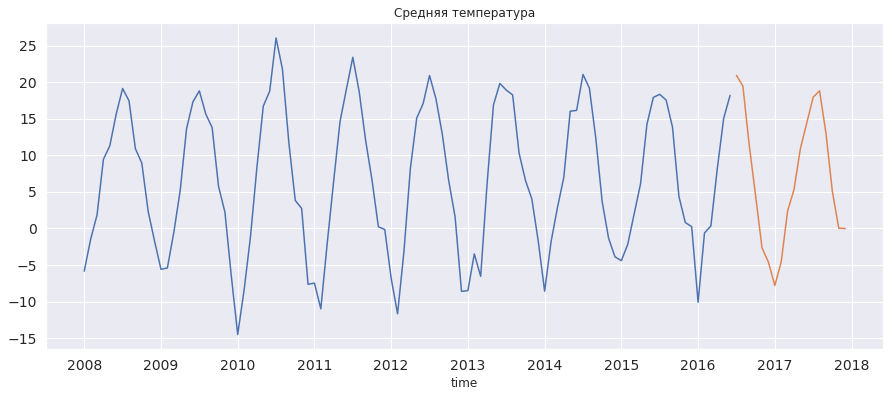

In [232]:
train_m.temperatureMean.plot(figsize=(15, 6),title= 'Средняя температура', fontsize=14)
test_m.temperatureMean.plot(figsize=(15, 6),title= 'Средняя температура', fontsize=14)

In [233]:
test_ = sm.tsa.adfuller(train_m.temperatureMean)
print ('adf: ', test_[0] )
print ('p-value: ', test_[1])
print('Critical values: ', test_[4])
if test_[0]> test_[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -8.010128491069766
p-value:  2.212832904225759e-12
Critical values:  {'1%': -3.5019123847798657, '5%': -2.892815255482889, '10%': -2.583453861475781}
единичных корней нет, ряд стационарен


In [234]:
train_diff_m = train_m.temperatureMean.diff(periods=12).dropna()

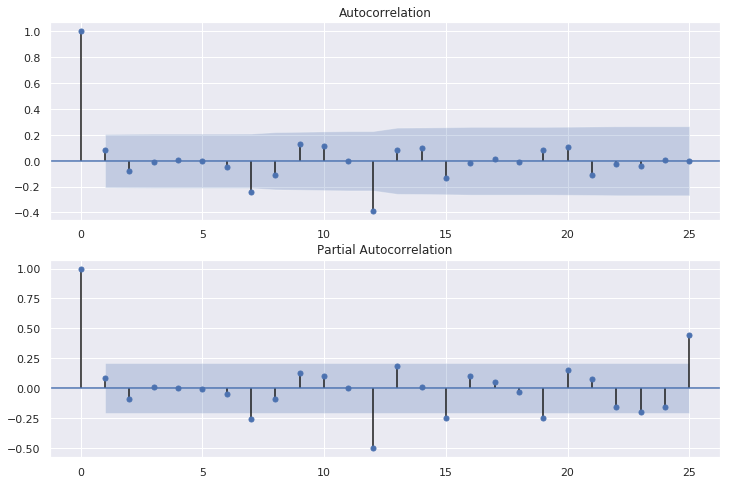

In [235]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_diff_m.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_diff_m, lags=25, ax=ax2)

In [236]:
p = 1
d = 0
q = 1

P = 1
D = 1
Q = 1
s = 12

In [237]:
%%time
best_model_m=sm.tsa.statespace.SARIMAX(train_m.temperatureMean.squeeze(), order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit()

CPU times: user 5.19 s, sys: 8.54 s, total: 13.7 s
Wall time: 1.76 s


## Остатки модели

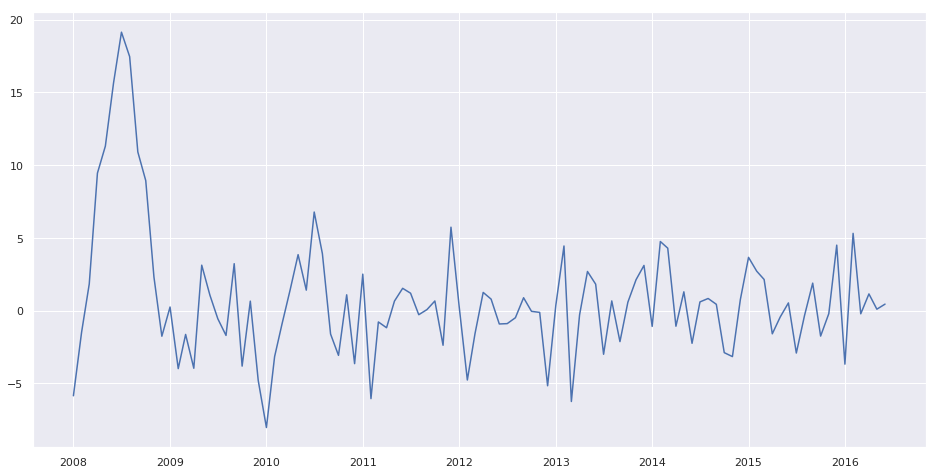

In [238]:
plt.figure(figsize=(16,8))
plt.plot(best_model_m.resid, label='Train')
plt.show()

In [239]:
stat_test = sm.tsa.adfuller(best_model_m.resid)
print ('adf: ', stat_test[0] )
print ('p-value: ', stat_test[1])
print('Critical values: ', stat_test[4])
if stat_test[0]> stat_test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -5.135262907188354
p-value:  1.1901922128345199e-05
Critical values:  {'1%': -3.4968181663902103, '5%': -2.8906107514600103, '10%': -2.5822770483285953}
единичных корней нет, ряд стационарен


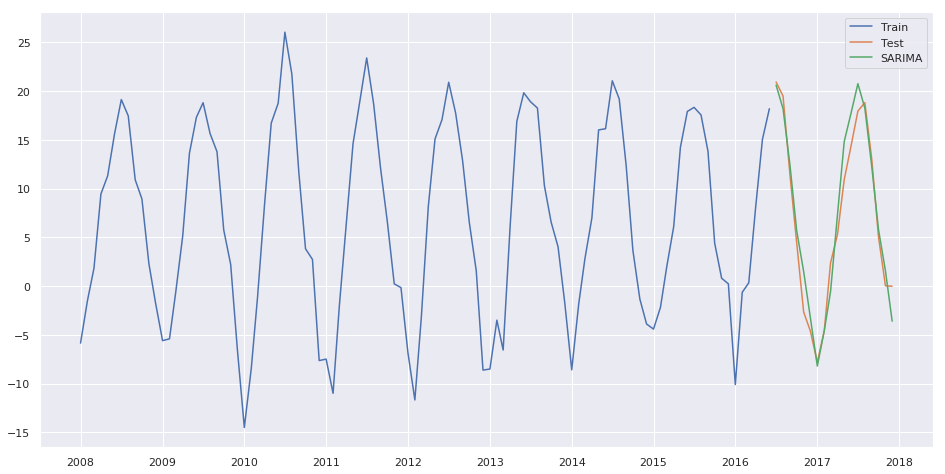

In [240]:
forecast = best_model_m.predict(start = train_m.shape[0], end = train_m.shape[0]+18)
y_hat_m = test_m.copy()
y_hat_m['SARIMA'] = forecast
plt.figure(figsize=(16,8))
plt.plot(train_m.temperatureMean, label='Train')
plt.plot(test_m.temperatureMean, label='Test')
plt.plot(y_hat_m['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [241]:
rms = sqrt(mean_squared_error(test_m.temperatureMean, y_hat_m.SARIMA))
print(rms)

2.203711595237061


Попоробуем подобрать параметры

In [280]:
ps = range(0, 4)
ds = range(0, 4)
qs = range(0, 4)
Ps = range(0, 2)
Ds = range(0, 2)
Qs = range(0, 2)

parameters = product(ps, ds, qs, Ps, Ds, Qs)
parameters_list = list(parameters)

In [243]:
%%time
results = []
best_rms = float("inf")
for param in tqdm(parameters_list):
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(train_m.temperatureMean.squeeze(), order=(param[0], param[1], param[2]),
                                        seasonal_order=(param[3],param[4], param[5], 12)).fit(disp=-1)
            
        forecast = model.predict(start = train_m.shape[0], end = train_m.shape[0]+18)
        y_hat_m['SARIMA'] = forecast
        rms = sqrt(mean_squared_error(test_m.temperatureMean, y_hat_m.SARIMA))

        #сохраняем лучшую модель, rms, параметры
        if rms < best_rms:
            best_model = model
            best_rms = rms
            best_param = param
        results.append([param, rms])
        #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except Exception:
        print('wrong parameters:', param)
        continue

warnings.filterwarnings('default')


  2%|▏         | 11/512 [00:02<02:47,  2.99it/s]

wrong parameters: (0, 0, 1, 0, 0, 0)
wrong parameters: (0, 0, 1, 0, 0, 1)



  3%|▎         | 13/512 [00:04<03:46,  2.20it/s]

wrong parameters: (0, 0, 1, 1, 0, 0)
wrong parameters: (0, 0, 1, 1, 0, 1)



  4%|▎         | 19/512 [00:06<04:54,  1.67it/s]

wrong parameters: (0, 0, 2, 0, 0, 0)
wrong parameters: (0, 0, 2, 0, 0, 1)



  4%|▍         | 21/512 [00:08<05:02,  1.62it/s]

wrong parameters: (0, 0, 2, 1, 0, 0)
wrong parameters: (0, 0, 2, 1, 0, 1)



  5%|▌         | 27/512 [00:11<06:35,  1.23it/s]

wrong parameters: (0, 0, 3, 0, 0, 0)
wrong parameters: (0, 0, 3, 0, 0, 1)



  5%|▌         | 28/512 [00:13<09:43,  1.21s/it]

wrong parameters: (0, 0, 3, 1, 0, 0)
wrong parameters: (0, 0, 3, 1, 0, 1)



 14%|█▍        | 74/512 [00:50<03:58,  1.84it/s]

wrong parameters: (0, 2, 1, 0, 1, 0)
wrong parameters: (0, 2, 1, 0, 1, 1)



 16%|█▌        | 81/512 [00:53<04:04,  1.76it/s]

wrong parameters: (0, 2, 1, 1, 1, 0)
wrong parameters: (0, 2, 1, 1, 1, 1)



 16%|█▌        | 82/512 [00:54<04:20,  1.65it/s]

wrong parameters: (0, 2, 2, 0, 1, 0)
wrong parameters: (0, 2, 2, 0, 1, 1)



 17%|█▋        | 86/512 [00:56<06:23,  1.11it/s]

wrong parameters: (0, 2, 2, 1, 1, 0)
wrong parameters: (0, 2, 2, 1, 1, 1)



 20%|██        | 104/512 [01:15<04:37,  1.47it/s]

wrong parameters: (0, 3, 1, 0, 0, 0)
wrong parameters: (0, 3, 1, 0, 0, 1)
wrong parameters: (0, 3, 1, 0, 1, 0)
wrong parameters: (0, 3, 1, 0, 1, 1)
wrong parameters: (0, 3, 1, 1, 0, 0)
wrong parameters: (0, 3, 1, 1, 0, 1)
wrong parameters: (0, 3, 1, 1, 1, 0)
wrong parameters: (0, 3, 1, 1, 1, 1)



 22%|██▏       | 115/512 [01:16<03:19,  1.99it/s]

wrong parameters: (0, 3, 2, 0, 1, 0)
wrong parameters: (0, 3, 2, 0, 1, 1)



 23%|██▎       | 118/512 [01:21<10:18,  1.57s/it]

wrong parameters: (0, 3, 2, 1, 1, 0)
wrong parameters: (0, 3, 2, 1, 1, 1)



 24%|██▍       | 122/512 [01:23<08:59,  1.38s/it]

wrong parameters: (0, 3, 3, 0, 1, 0)
wrong parameters: (0, 3, 3, 0, 1, 1)



 25%|██▌       | 130/512 [01:33<15:00,  2.36s/it]

wrong parameters: (0, 3, 3, 1, 1, 0)
wrong parameters: (0, 3, 3, 1, 1, 1)



 30%|███       | 154/512 [01:49<04:19,  1.38it/s]

wrong parameters: (1, 0, 3, 0, 1, 0)
wrong parameters: (1, 0, 3, 0, 1, 1)



 31%|███       | 158/512 [01:53<05:47,  1.02it/s]

wrong parameters: (1, 0, 3, 1, 1, 0)
wrong parameters: (1, 0, 3, 1, 1, 1)



 34%|███▍      | 176/512 [02:04<07:02,  1.26s/it]

wrong parameters: (1, 1, 2, 0, 0, 0)
wrong parameters: (1, 1, 2, 0, 0, 1)



 35%|███▌      | 180/512 [02:06<06:33,  1.18s/it]

wrong parameters: (1, 1, 2, 1, 0, 0)
wrong parameters: (1, 1, 2, 1, 0, 1)



 36%|███▌      | 184/512 [02:11<07:36,  1.39s/it]

wrong parameters: (1, 1, 3, 0, 0, 0)
wrong parameters: (1, 1, 3, 0, 0, 1)



 37%|███▋      | 188/512 [02:14<07:53,  1.46s/it]

wrong parameters: (1, 1, 3, 1, 0, 0)
wrong parameters: (1, 1, 3, 1, 0, 1)



 41%|████      | 210/512 [02:33<04:42,  1.07it/s]

wrong parameters: (1, 2, 2, 0, 1, 0)
wrong parameters: (1, 2, 2, 0, 1, 1)



 42%|████▏     | 214/512 [02:37<05:55,  1.19s/it]

wrong parameters: (1, 2, 2, 1, 1, 0)
wrong parameters: (1, 2, 2, 1, 1, 1)
wrong parameters: (1, 2, 3, 0, 0, 0)
wrong parameters: (1, 2, 3, 0, 0, 1)



 43%|████▎     | 220/512 [02:42<09:29,  1.95s/it]

wrong parameters: (1, 2, 3, 1, 0, 0)
wrong parameters: (1, 2, 3, 1, 0, 1)



 46%|████▌     | 234/512 [02:52<02:42,  1.71it/s]

wrong parameters: (1, 3, 1, 0, 1, 0)
wrong parameters: (1, 3, 1, 0, 1, 1)



 46%|████▋     | 238/512 [02:53<02:28,  1.84it/s]

wrong parameters: (1, 3, 1, 1, 1, 0)
wrong parameters: (1, 3, 1, 1, 1, 1)



 47%|████▋     | 242/512 [02:55<02:36,  1.72it/s]

wrong parameters: (1, 3, 2, 0, 1, 0)
wrong parameters: (1, 3, 2, 0, 1, 1)



 48%|████▊     | 246/512 [02:59<05:38,  1.27s/it]

wrong parameters: (1, 3, 2, 1, 1, 0)
wrong parameters: (1, 3, 2, 1, 1, 1)



 49%|████▉     | 250/512 [03:01<04:58,  1.14s/it]

wrong parameters: (1, 3, 3, 0, 1, 0)
wrong parameters: (1, 3, 3, 0, 1, 1)



 50%|█████     | 257/512 [03:05<04:09,  1.02it/s]

wrong parameters: (1, 3, 3, 1, 1, 0)
wrong parameters: (1, 3, 3, 1, 1, 1)



 55%|█████▌    | 282/512 [03:30<03:20,  1.15it/s]

wrong parameters: (2, 0, 3, 0, 1, 0)
wrong parameters: (2, 0, 3, 0, 1, 1)



 56%|█████▌    | 286/512 [03:33<03:14,  1.16it/s]

wrong parameters: (2, 0, 3, 1, 1, 0)
wrong parameters: (2, 0, 3, 1, 1, 1)



 58%|█████▊    | 296/512 [03:38<03:50,  1.07s/it]

wrong parameters: (2, 1, 1, 0, 0, 0)
wrong parameters: (2, 1, 1, 0, 0, 1)



 59%|█████▊    | 300/512 [03:41<04:25,  1.25s/it]

wrong parameters: (2, 1, 1, 1, 0, 0)
wrong parameters: (2, 1, 1, 1, 0, 1)



 59%|█████▉    | 304/512 [03:46<05:06,  1.47s/it]

wrong parameters: (2, 1, 2, 0, 0, 0)
wrong parameters: (2, 1, 2, 0, 0, 1)



 60%|██████    | 308/512 [03:48<04:33,  1.34s/it]

wrong parameters: (2, 1, 2, 1, 0, 0)
wrong parameters: (2, 1, 2, 1, 0, 1)



 61%|██████    | 312/512 [03:55<07:12,  2.16s/it]

wrong parameters: (2, 1, 3, 0, 0, 0)
wrong parameters: (2, 1, 3, 0, 0, 1)



 62%|██████▏   | 316/512 [04:02<08:36,  2.63s/it]

wrong parameters: (2, 1, 3, 1, 0, 0)
wrong parameters: (2, 1, 3, 1, 0, 1)



 64%|██████▍   | 328/512 [04:19<04:21,  1.42s/it]

wrong parameters: (2, 2, 1, 0, 0, 0)
wrong parameters: (2, 2, 1, 0, 0, 1)



 65%|██████▍   | 332/512 [04:21<03:53,  1.30s/it]

wrong parameters: (2, 2, 1, 1, 0, 0)
wrong parameters: (2, 2, 1, 1, 0, 1)



 66%|██████▌   | 338/512 [04:28<03:28,  1.20s/it]

wrong parameters: (2, 2, 2, 0, 1, 0)
wrong parameters: (2, 2, 2, 0, 1, 1)



 69%|██████▉   | 353/512 [04:32<02:24,  1.10it/s]

wrong parameters: (2, 2, 2, 1, 1, 0)
wrong parameters: (2, 2, 2, 1, 1, 1)
wrong parameters: (2, 2, 3, 0, 0, 0)
wrong parameters: (2, 2, 3, 0, 0, 1)
wrong parameters: (2, 2, 3, 0, 1, 0)
wrong parameters: (2, 2, 3, 0, 1, 1)
wrong parameters: (2, 2, 3, 1, 0, 0)
wrong parameters: (2, 2, 3, 1, 0, 1)
wrong parameters: (2, 2, 3, 1, 1, 0)
wrong parameters: (2, 2, 3, 1, 1, 1)



 72%|███████▏  | 370/512 [04:55<03:54,  1.65s/it]

wrong parameters: (2, 3, 2, 0, 1, 0)
wrong parameters: (2, 3, 2, 0, 1, 1)



 73%|███████▎  | 374/512 [05:01<04:30,  1.96s/it]

wrong parameters: (2, 3, 2, 1, 1, 0)
wrong parameters: (2, 3, 2, 1, 1, 1)



 74%|███████▍  | 378/512 [05:03<03:23,  1.52s/it]

wrong parameters: (2, 3, 3, 0, 1, 0)
wrong parameters: (2, 3, 3, 0, 1, 1)



 75%|███████▌  | 385/512 [05:07<02:19,  1.10s/it]

wrong parameters: (2, 3, 3, 1, 1, 0)
wrong parameters: (2, 3, 3, 1, 1, 1)



 78%|███████▊  | 400/512 [05:19<02:12,  1.19s/it]

wrong parameters: (3, 0, 2, 0, 0, 0)
wrong parameters: (3, 0, 2, 0, 0, 1)
wrong parameters: (3, 0, 2, 0, 1, 0)
wrong parameters: (3, 0, 2, 0, 1, 1)
wrong parameters: (3, 0, 2, 1, 0, 0)
wrong parameters: (3, 0, 2, 1, 0, 1)
wrong parameters: (3, 0, 2, 1, 1, 0)
wrong parameters: (3, 0, 2, 1, 1, 1)



 80%|████████  | 410/512 [05:21<01:40,  1.02it/s]

wrong parameters: (3, 0, 3, 0, 1, 0)
wrong parameters: (3, 0, 3, 0, 1, 1)



 81%|████████▏ | 417/512 [05:24<01:24,  1.13it/s]

wrong parameters: (3, 0, 3, 1, 1, 0)
wrong parameters: (3, 0, 3, 1, 1, 1)



 84%|████████▍ | 432/512 [05:44<03:04,  2.30s/it]

wrong parameters: (3, 1, 2, 0, 0, 0)
wrong parameters: (3, 1, 2, 0, 0, 1)



 85%|████████▌ | 436/512 [05:49<02:48,  2.21s/it]

wrong parameters: (3, 1, 2, 1, 0, 0)
wrong parameters: (3, 1, 2, 1, 0, 1)



 88%|████████▊ | 449/512 [05:58<02:18,  2.19s/it]

wrong parameters: (3, 1, 3, 0, 0, 0)
wrong parameters: (3, 1, 3, 0, 0, 1)
wrong parameters: (3, 1, 3, 0, 1, 0)
wrong parameters: (3, 1, 3, 0, 1, 1)
wrong parameters: (3, 1, 3, 1, 0, 0)
wrong parameters: (3, 1, 3, 1, 0, 1)
wrong parameters: (3, 1, 3, 1, 1, 0)
wrong parameters: (3, 1, 3, 1, 1, 1)



 93%|█████████▎| 478/512 [06:24<01:04,  1.90s/it]

wrong parameters: (3, 2, 2, 0, 0, 0)
wrong parameters: (3, 2, 2, 0, 0, 1)
wrong parameters: (3, 2, 2, 0, 1, 0)
wrong parameters: (3, 2, 2, 0, 1, 1)
wrong parameters: (3, 2, 2, 1, 0, 0)
wrong parameters: (3, 2, 2, 1, 0, 1)
wrong parameters: (3, 2, 2, 1, 1, 0)
wrong parameters: (3, 2, 2, 1, 1, 1)
wrong parameters: (3, 2, 3, 0, 0, 0)
wrong parameters: (3, 2, 3, 0, 0, 1)
wrong parameters: (3, 2, 3, 0, 1, 0)
wrong parameters: (3, 2, 3, 0, 1, 1)
wrong parameters: (3, 2, 3, 1, 0, 0)
wrong parameters: (3, 2, 3, 1, 0, 1)
wrong parameters: (3, 2, 3, 1, 1, 0)
wrong parameters: (3, 2, 3, 1, 1, 1)



 97%|█████████▋| 496/512 [06:51<00:41,  2.62s/it]

wrong parameters: (3, 3, 2, 0, 0, 0)
wrong parameters: (3, 3, 2, 0, 0, 1)
wrong parameters: (3, 3, 2, 0, 1, 0)
wrong parameters: (3, 3, 2, 0, 1, 1)
wrong parameters: (3, 3, 2, 1, 0, 0)
wrong parameters: (3, 3, 2, 1, 0, 1)
wrong parameters: (3, 3, 2, 1, 1, 0)
wrong parameters: (3, 3, 2, 1, 1, 1)



 99%|█████████▉| 506/512 [06:54<00:12,  2.08s/it]

wrong parameters: (3, 3, 3, 0, 1, 0)
wrong parameters: (3, 3, 3, 0, 1, 1)



100%|██████████| 512/512 [07:00<00:00,  1.22it/s]

wrong parameters: (3, 3, 3, 1, 1, 0)
wrong parameters: (3, 3, 3, 1, 1, 1)
CPU times: user 18min 33s, sys: 33min 19s, total: 51min 53s
Wall time: 7min


In [244]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'rms']
result_table.sort_values(by = 'rms', ascending=True).head(10)

parameters       rms
98   (1, 0, 0, 1, 1, 0)  1.961921
10   (0, 0, 1, 1, 1, 0)  1.963496
282  (3, 0, 0, 1, 1, 0)  1.965092
290  (3, 0, 1, 1, 1, 0)  1.965343
194  (2, 0, 0, 1, 1, 0)  1.965355
202  (2, 0, 1, 1, 1, 0)  1.965454
106  (1, 0, 1, 1, 1, 0)  1.965536
210  (2, 0, 2, 1, 1, 0)  1.965570
114  (1, 0, 2, 1, 1, 0)  1.965629
14   (0, 0, 2, 1, 1, 0)  1.965635

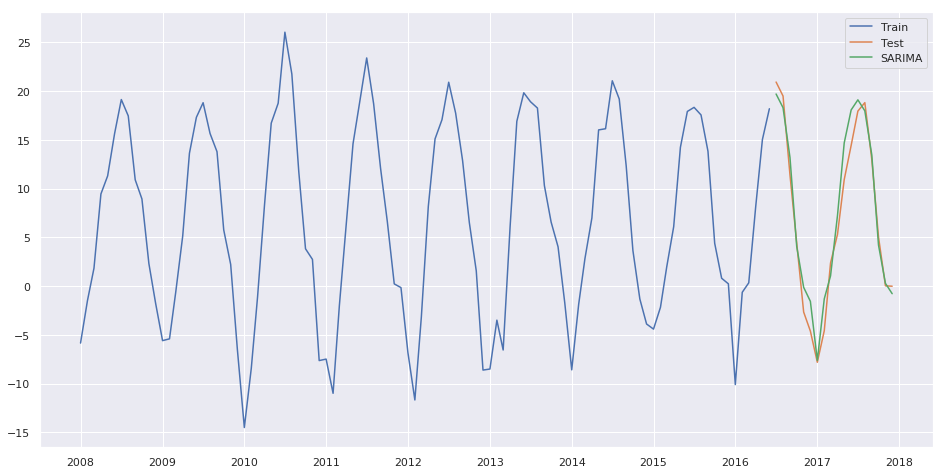

In [245]:
forecast = best_model.predict(start = train_m.shape[0], end = train_m.shape[0]+18)
y_hat_m = test_m.copy()
y_hat_m['SARIMA'] = forecast
plt.figure(figsize=(16,8))
plt.plot(train_m.temperatureMean, label='Train')
plt.plot(test_m.temperatureMean, label='Test')
plt.plot(y_hat_m['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [246]:
rms = sqrt(mean_squared_error(test_m.temperatureMean, y_hat_m.SARIMA))
print(rms)

1.9619209417209482


### Также была создана модель SARIMAX для прогнозирования ежедневных колебаний температур, работа выполнена в отдельном файле.

![forecast](plots/predict.png)



### Выводы 

* Был проведен анализ данных погоды в Москве. Данные были получены от Всероссийского научно-исследовательского института гидрометеорологической информации – Мирового центра данных (с метеостанции ВДНХ) с помощью Dark Sky API. Анализ выявил несколько интересных инсайтов: 
* Отметим, что в 2010 и 2011 годах наблюдалась аномально высокая температура летом и аномально низкая температура зимой, то есть перепад между предельными температурами был крайне велик. Это видно из тепловой диаграммы и других графиков. Еще один интересный факт – чем ниже температура зимой, тем выше температура летом и наоборот. 
* В последнее десятилетие климат Москвы становится теплее, то есть происходит постепенное увеличение среднегодовой температуры. 
* Времена года на самом деле сдвинуты на месяц вперед. 
* Из тепловой карты видно, что самым сухим месяцем в году является март, а наибольшее количество осадков выпадает в июле. Отметим, что этот результат согласуется с данными из Википедии (https://ru.wikipedia.org/wiki/Климат_Москвы).
* Еще один интересный факт: средняя температура апреля из года в год то увеличивается, то уменьшается. Другими словами, наблюдается периодичность. 
* Весна и осень вполне неплохо разделяются на графиках KDE по двум признакам: по ультрафиолетовому индексу (УФ-индекс) и по точке росы. Тем не менее, разделить их очень сложно. Например, по влажности воздуха и средней температуре этого сделать не получится, так как температурные показатели весны и осени крайне близки друг к другу. Этот факт также подтвердился при составлении статистических гипотез. 
* Зима и лето легко разделяются на графиках KDE по средней температуре (что вполне очевидно) и по влажности воздуха. Действительно, температурные показатели зимы и лета сильно различаются. Этот факт также подтвердился при составлении статистических гипотез (с помощью Критерия Манна-Уитни). 
Построены предсказания временного ряда средней ежемесячной температуры и ежедневной температуры 
* Была создана модель SARIMAX для прогнозирования месячных колебаний средней температуры, а также проведен подбор параметров модели SARIMAX. В результате оптимальный набор параметров: (1, 0, 0) (1, 1, 0)$_{12}$. При прогнозировании на 18 месяцев RMS = 1.961921. 
* Также была создана модель SARIMAX для прогнозирования ежедневных колебаний температур. При прогнозировании на один месяц RMS = 5.23. 